# Project 4: Web Scraping Indeed.com & Predicting Salaries

### Introduction/Problem Statement.
As a job seeker, it is important for me to be able to know whether a job I'm applying to will be a well-paid or not. Unfortunately, most job postings are not up-front about their salary 

In [3]:
URL = 'http://www.indeed.com/q-data-scientist-l-Atlanta,-GA-jobs.html'

In [4]:
import requests
import bs4
from bs4 import BeautifulSoup

In [5]:
# read site in soup
r = requests.get(URL)
soup = BeautifulSoup(r.content, "lxml")

# Append to the full set of results
results = soup.findAll('div', { "class" : "result" })

Let's look at one result more closely. A single `result` looks like

```
<div class=" row result" data-jk="2480d203f7e97210" data-tn-component="organicJob" id="p_2480d203f7e97210" itemscope="" itemtype="http://schema.org/JobPosting">
<h2 class="jobtitle" id="jl_2480d203f7e97210">
<a class="turnstileLink" data-tn-element="jobTitle" onmousedown="return rclk(this,jobmap[0],1);" rel="nofollow" target="_blank" title="AVP/Quantitative Analyst">AVP/Quantitative Analyst</a>
</h2>
<span class="company" itemprop="hiringOrganization" itemtype="http://schema.org/Organization">
<span itemprop="name">
<a href="/cmp/Alliancebernstein?from=SERP&amp;campaignid=serp-linkcompanyname&amp;fromjk=2480d203f7e97210&amp;jcid=b374f2a780e04789" target="_blank">
    AllianceBernstein</a></span>
</span>
<tr>
<td class="snip">
<nobr>$117,500 - $127,500 a year</nobr>
<div>
<span class="summary" itemprop="description">
C onduct quantitative and statistical research as well as portfolio management for various investment portfolios. Collaborate with Quantitative Analysts and</span>
</div>
</div>
</td>
</tr>
</table>
</div>
```

While this has some of the more verbose elements removed, we can see that there is some structure to the above:
- The salary is available in a `nobr` element inside of a `td` element with `class='snip`.
- The title of a job is in a link with class set to `jobtitle` and a `data-tn-element="jobTitle`.  
- The location is set in a `span` with `class='location'`. 
- The company is set in a `span` with `class='company'`. 

### Write 4 functions to extract each item: location, company, job, and salary.

example: 
```python
def extract_location_from_result(result):
    return result.find ...
```

- Make sure these functions are robust and can handle cases where the data/field may not be available
- Test the functions on the results above

In [7]:
def extract_text(el):
    if el:
        return el.text.strip()
    else:
        return ''
extract_text(results[1])

# company
def get_company_from_result(result):
    return extract_text(result.find('span', {'class' : 'company'}))
print get_company_from_result(results[1]) #test

# location
def get_location_from_result(result):
    return extract_text(result.find('span', {'class':'location'}))
print get_location_from_result(results[1]) #test

# summary
def get_summary_from_result(result):
    return extract_text(result.find('span', {'class':'summary'}))
print get_summary_from_result(results[1]) #test

# title
def get_title_from_result(result):
    return extract_text(result.find('a', {'data-tn-element' : 'jobTitle'}))
print get_title_from_result(results[2]) #test

# get salary if exists
def get_salary_from_result(result):
    salary_table = result.find('td', {'class' : 'snip'})
    if salary_table:
        snip = salary_table.find('nobr')
        if snip:
            return snip.text.strip()   
    return None
print get_salary_from_result(results[0]) #test

u'Data Scientist\n\n\n\n\n        Cox Automotive\n\n - \n46 reviews\n - Atlanta, GA\n\n\nInterprets problems and develops solutions to business problems using data analysis, data mining, optimization tools, and machine learning techniques and...\n\n\n30+ days ago window[\'sj_result_4dd0428a36b610d7\'] = {"showSource": false, "source": "Cox Automotive", "loggedIn": false, "showMyJobsLinks": true,"undoAction": "unsave","relativeJobAge": "30+ days ago","jobKey": "4dd0428a36b610d7", "myIndeedAvailable": true, "tellAFriendEnabled": false, "showMoreActionsLink": false, "resultNumber": 11, "jobStateChangedToSaved": false, "searchState": "q=data scientist&amp;l=Atlanta%2C+GA", "basicPermaLink": "http://www.indeed.com", "saveJobFailed": false, "removeJobFailed": false, "requestPending": false, "notesEnabled": false, "currentPage" : "serp", "sponsored" : true,"reportJobButtonEnabled": false, "showMyJobsHired": false, "showSaveForSponsored": false};\n\n\n\n\nSponsored'

In [14]:
# adding some other variables as well
# when posted may be associated with salary (maybe jobs that pay better get snatched up more quickly)
def get_date_posted(result):
    return extract_text(result.find('span', {'class':'date'}))
print get_date_posted(results[1])

# whether sponsored may be associated with salary (sponsored jobs may indicate a company with more money, or more desperate?)
def get_is_sponsored(result):
    is_sponsored = extract_text(result.find('span', {'class':'sdn'}))
    if is_sponsored:
        return is_sponsored
    return None
print get_is_sponsored(results[1])

# number of reviews may be associated with salary
def get_number_reviews(result):
    x = extract_text(result.find('span', {'class': 'slNoUnderline'}))
    if x:
        return x
    return None
print get_number_reviews(results[0])

# get star rating
import re

def get_star_rating(result):
    find_rating = result.find('span',{'class':'rating'})
    if find_rating:
        search_in = str(find_rating)
        return 5*float(re.findall('width: (.*)px', search_in)[0])/60
    return None
get_star_rating(results[8])



3.7

In [16]:
# I may want to look into a job in more detail, so I'll include the link
def get_link(result):
    find_rating = result.find('a',{'class' : 'jobtitle turnstileLink'}, href=True)
    if find_rating:
        search_in = str(find_rating)
        return 'http://www.indeed.com'+ find_rating.attrs['href']
    find_rating = result.find('a',{'rel' : 'nofollow'})
    if find_rating:
        search_in = str(find_rating)
        return 'http://www.indeed.com'+ find_rating.attrs['href']
    return None
get_link(results[8])

'http://www.indeed.com/rc/clk?jk=b950c132b2440486&fccid=105ecfd0283f415f'

Now, to scale up our scraping, we need to accumulate more results. We can do this by examining the URL above.

- "http://www.indeed.com/jobs?q=data+scientist+%2420%2C000&l=New+York&start=10"

There are two query parameters here we can alter to collect more results: the `l=New+York` and the `start=10`. The first controls the location of the results (so we can try different city). The second controls where in the results to start and gives 10 results (so we can keep incrementing this by 10 to move further within the list).

#### Complete the following code to collect results from multiple cities and start points. 
- Enter your city below to add it to the search
- Remember to convert your salary to U.S. Dollars to match the other cities if the currency is different

In [18]:
cities = ['Atlanta, GA', 'Washington, DC', 'New York, NY', 'New Orleans, LA', 'Boston, MA', 
         'Austin, TX', 'Seattle, WA', 'San Francisco, CA', 'Detroit, MI', 'Minneapolis, MN',]

In [19]:
# create template URL and max number of results (pages) to pull
url_template = "http://www.indeed.com/jobs?q=data+scientist&l={}&start={}"

In [21]:
# for loop to pull data with bs4
results = []
starts = [] #I want to keep track of what page something appears on
city_state = [] #I want to keep track of what city I searched in, since not all results are in the city.
for city in cities:
    city = city.replace(' ', '+')
    for start in range(0,2000,10):
        r = requests.get(url_template.format(city, start))
        # Grab the results from the request (as above)
        soup = BeautifulSoup(r.content)
        # Append to the full set of results
        results += soup.findAll('div', { "class" : "result" })
        starts.extend([start]*len(soup.findAll('div', { "class" : "result" })))
        city_state.extend([city]*len(soup.findAll('div', { "class" : "result" })))

//anaconda/envs/py27/lib/python2.7/site-packages/bs4/__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 174 of the file //anaconda/envs/py27/lib/python2.7/runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup([your markup])

to this:

 BeautifulSoup([your markup], "lxml")

  markup_type=markup_type))


In [23]:
#checking that lengths match so I can ensure the data is corrent when I add it to my dataframe.
print len(results)
print len(starts)
print len(city_state)

29898
29898
29898


#### Use the functions you wrote above to parse out the 4 fields - location, title, company and salary. Create a dataframe from the results with those 4 columns.

In [24]:
# combine data into dictionaries company location summary title salary
rows = []
for i, result in enumerate(results):
    if result:
        row = {'company': get_company_from_result(result),
              'location': get_location_from_result(result),
              'summary': get_summary_from_result(result),
              'title': get_title_from_result(result),
              'salary': get_salary_from_result(result),
              'date_posted': get_date_posted(result),
              'sponsored': get_is_sponsored(result),
              'star_rating': get_star_rating(result),
              'search_city':city_state[i],
              'start': starts[i],
              'website': get_link(result), 
              'number_reviews': get_number_reviews(result)}
        rows.append(row)



In [26]:
# create dataframe
import pandas as pd
ds_jobs = pd.DataFrame(rows)
ds_jobs.info

(29898, 12)

In [27]:
pd.options.display.max_colwidth = 1000
ds_jobs.head()

,company,date_posted,location,number_reviews,salary,search_city,sponsored,star_rating,start,summary,title,website
0,Cotiviti,30+ days ago,"Atlanta, GA",30 reviews,None,"Atlanta,+GA",Sponsored,3.35,0,This is a pioneering data scientist who will participate in expanding the new analytics backbone. Cotiviti is looking for an industry leading Data Scientist to...,Data Scientist,http://www.indeed.com/pagead/clk?mo=r&ad=-6NYlbfkN0AbexXlh6WlNaC12RNLKcRQH8fywLm61v9KQllly0vTVrm9U0Iy0AOsYwOq9YOpDX03iprvWHw_SY6xCXG90mwLvOd8fb5BdJ-fu_-2tfp_KoWry1hPm7FaVRyBGPoeYEaNltu7W5i0j-OYtPh1ozEJ4oN7u_zLF7PnEIYwsSJTUyra1nlPHHQpGEq7KH9P1UhJyt0gLdmaXr7oC9iG41hrLTLQM6Dy4jOfZIDOXaBdIjV_m-vrLzXNwMCEHNxAuNUsOUWu9fNUIO6h2dpkDtS46fwUq5bUGThLBpg1h_JsmngU4OOpPDCmzhyOIZujq7kpNxhKt2UxH0Sm5knOVKSmYxJ1lNKEnygA8DCD6U_1zkkTxJJ5LBcAr9lpizyc6MVLmeSSISBIrGKE9SvJv_WjfNXpznu3719huu8jLhA-4dpvovDIXnXZf5ddKRiNMGDJ_o8d2rLvrnNdM6ksJXYj&p=1&sk=&fvj=0
1,Cox Automotive,30+ days ago,"Atlanta, GA",46 reviews,None,"Atlanta,+GA",Sponsored,3.40,0,"Interprets problems and develops solutions to business problems using data analysis, data mining, optimization tools, and machine learning techniques and...",Data Scientist,http://www.indeed.com/pagead/clk?mo=r&ad=-6NYlbfkN0Aqmv_5JD5v6gg1ICRL12VY6BolF0XAUkQtat1DEGOKAas7v4hqpX3lzUM4h7L4VGsyuyDvf1POStkSJgHsuP2fB8YliLIijj53wvHBII5P9eQQwhBoT2Vrz0Dv0LOR9cmhA2uclIYN001l_R0jB6OflQ3KEmNIKzoNezeQCnu5X1bPju79uAEHbaTS6LdJvB-hJTy0PZPPeNKSkMyWxp3Wc2N8qN2FIq69xIhd7NBdjwnWuSZEDZvdGAtcdwsplmc_6i_owekmLU0Zj9rRIQYMM4CCSqkchPU_LsOfeRYl0NSHhXylFvCq02OyIvg1KznvqQ7PPXo_fB0sk1_bs3_otngXRLhv8vkj1BFB91Yk951kq_RGaTq5Z94UiOx8vqbM6V4495DCvkTFhmxPx8jUsGpZ6kQVHUXPRdq4CZxNPdlpgypTkUKGSHiuF2jTN7edfKfbZELHMxMILPWKq1PX7Etfm45MtiI=&p=2&sk=&fvj=0
2,Honeywell,30+ days ago,"Atlanta, GA","3,557 reviews",None,"Atlanta,+GA",Sponsored,3.70,0,"Support and mentor data scientists. Minimum of 5 years of experience in a combination of data science, machine learning, predictive analytics, statistical...","Principal Data Scientist - Atlanta, GA",http://www.indeed.com/pagead/clk?mo=r&ad=-6NYlbfkN0BT1oD7gxL4d4q7k2XK_xqJz55UkLlcqeX4XFuXt5iz9snYfsSUT3YCjhoIHnNQ-5Dn3WpSwV_to5gRmnY1dWxevmGFzqLqqlIFz_9Edyh1_IXncaR6MCLo7f5ouI8dmb8uuCR-Gmx3D0JDk0Mr6-bDRl6_oL__-yabT9kowHDUPeBtZkMJognwbgSn7JKNdyR8xVuWFFOTK19pmuU2dd5avUCBVFtU2sKLt8sbDK9kZmatBTvLWw9mSk9saicemGkngM_SN-JaPwW2wHCjEO5hK98T035f01nOI9o3ia3L5wR1VUQJgkEqq37uz9VQlxlzLpE9e-1UkEpSSuVpab7uYAzIunguUW-Veb9PE7QBNJkn1V2aLOTbuEYDgbiHxkQQy5UqMb6a7SV1IxkpbHkbfInjk9I-rbwVtqZduH3r8D_W_d1EbYFUhzGETCT-VTLBqqwyAv_rFadY2vmiP5R3t_H5qjb5foJI0iHryGOAf4taEETWvPjj5-ovMDCSWJlDwEvyiMmFjw==&p=3&sk=&fvj=0
3,"Vision3 Solutions, Inc",1 day ago,"Atlanta, GA",None,$90 an hour,"Atlanta,+GA",None,NaN,0,Data Scientist- Big Data*. May write code to automate reports and templates and consolidate data into reports and knowledge. 12 Months Contract*....,Data Scientist- Big Data,"http://www.indeed.com/company/Vision3-Solutions,-Inc/jobs/Data-Scientist-1a8c086f5f6f1294?r=1&fccid=37d33d67f3fba52b"
4,FraudScope,2 days ago,"Atlanta, GA",None,None,"Atlanta,+GA",None,NaN,0,Experience with healthcare-related data and familiarity with current methods applied to healthcare data is preferred....,Data Scientist,http://www.indeed.com/company/FraudScope/jobs/Data-Scientist-d72c337465398caf?r=1&fccid=e87f46501099545c


In [28]:
# looking at sponsored posts to see if they account for the majority of my duplicates
print 'before drop', ds_jobs.sponsored.value_counts()
print '\ndrop size', ds_jobs.drop_duplicates([x for x in ds_jobs.columns if x != 'start' and x != 'website']).shape
print '\nafter drop', ds_jobs.drop_duplicates([x for x in ds_jobs.columns if x != 'start' and x != 'website']).sponsored.value_counts()

before drop Sponsored                               11466
Sponsored by Amazon.com                  2075
Sponsored by The Home Depot               328
Urgently Hiring                           226
Sponsored by Target Corporation           200
Sponsored by WorkableHR Sponsored         199
Ad: Urgently Hiring                       174
Sponsored by Cox Communications Inc.      154
Name: sponsored, dtype: int64

drop size (5535, 12)

after drop Sponsored                               71
Sponsored by Amazon.com                 21
Ad: Urgently Hiring                      2
Sponsored by The Home Depot              2
Urgently Hiring                          2
Sponsored by WorkableHR Sponsored        1
Sponsored by Target Corporation          1
Sponsored by Cox Communications Inc.     1
Name: sponsored, dtype: int64


In [29]:
# making a copy so I can refer to original if needed without having to re-run
ds_jobs_clean = ds_jobs.copy()

# drop duplicates (not considering 'start' column because I want to eliminate things that appeared more than once)
# (also not considering website because the sponsored ads sometimes have different links each time they appear)
ds_jobs_clean.drop_duplicates([x for x in ds_jobs.columns if x != 'start' and x != 'website'], inplace=True)

In [264]:
ds_jobs_clean.columns

Index([u'company', u'date_posted', u'location', u'number_reviews', u'salary',
       u'search_city', u'sponsored', u'star_rating', u'start', u'summary',
       u'title', u'website', u'how_paid', u'annual_salary', u'is_sponsored',
       u'time_since_posted', u'in_city', u'page'],
      dtype='object')

Lastly, we need to clean up salary data. 

1. Only a small number of the scraped results have salary information - only these will be used for modeling.
1. Some of the salaries are not yearly but hourly or weekly, these will not be useful to us for now
1. Some of the entries may be duplicated
1. The salaries are given as text and usually with ranges.

#### Find the entries with annual salary entries, by filtering the entries without salaries or salaries that are not yearly (filter those that refer to hour or week). Also, remove duplicate entries

In [31]:
# investigating to see what kinds of variables I have here.
pd.options.display.max_rows = 200
ds_jobs_clean.salary.value_counts()

$120,000 a year               8
$150,000 - $200,000 a year    6
$150,000 a year               6
$130,000 a year               6
$110,000 a year               5
$140,000 - $160,000 a year    5
$100,000 a year               4
$100,000 - $125,000 a year    4
$120,000 - $150,000 a year    4
$160,000 a year               4
$140,000 a year               4
$200,000 a year               4
$80,000 a year                3
$180,000 a year               3
$80,000 - $100,000 a year     3
$100,000 - $120,000 a year    3
$70,286 - $88,213 a year      3
$5,400 - $6,500 a month       3
$90,000 a year                2
$59,708 - $72,246 a year      2
$110,000 - $180,000 a year    2
$90,000 - $120,000 a year     2
$90,000 - $140,000 a year     2
$110,000 - $140,000 a year    2
$15 - $20 an hour             2
$4,319 - $6,183 a month       2
$50,000 - $65,000 a year      2
$98,202 - $125,346 a year     2
$125,000 a year               2
$80,000 - $160,000 a year     2
$70,000 - $85,000 a year      2
$75,000 

In [32]:
import re
import numpy as np
def get_standardized_salary(salary_string):
    if salary_string:
        if re.findall('(.*) a year', salary_string):
            matches = re.findall('([0-9]+,[0-9]+)', salary_string)
            return np.mean([float(salary.replace(',', '')) for salary in matches ])
        elif re.findall('(.*) a month', salary_string):
            matches = re.findall('([0-9]+,[0-9]+|[0-9]+)', salary_string)
            return np.mean([float(salary.replace(',', '')) for salary in matches ])*12
        elif re.findall('(.*) a week', salary_string):
            matches = re.findall('([0-9]+,[0-9]+|[0-9]+)', salary_string)
            return np.mean([float(salary.replace(',', '')) for salary in matches ])*52
        elif re.findall('(.*) a day', salary_string):
            matches = re.findall('([0-9]+,[0-9]+|[0-9]+)', salary_string)
            return np.mean([float(salary.replace(',', '')) for salary in matches ])*5*52
        elif re.findall('(.*) an hour', salary_string):
            matches = re.findall('([0-9]+\.[0-9]+|[0-9]+)', salary_string)
            return np.mean([float(salary.replace(',', '')) for salary in matches ])*8*5*52
    else:
        return None

# How paid (monthly, yearly, etc.) may affect outcome so I want to keep track of that 
def get_how_paid(salary_string):
    if salary_string:
        if re.findall('(.*) a year', salary_string):
            return 'yearly'
        elif re.findall('(.*) a month', salary_string):
            return 'monthly'
        elif re.findall('(.*) a week', salary_string):
            return 'weekly'
        elif re.findall('(.*) a day', salary_string):
            return 'daily'
        elif re.findall('(.*) an hour', salary_string):
            return 'hourly'
        else:
            return None
# checking if it works on multiple types
print get_standardized_salary(None) 
print get_standardized_salary('20,000 to 50,000 a year')
print get_standardized_salary('$20,000 a year')
print get_standardized_salary('$20,000 a year')
print '\n'
print get_how_paid('125,000−150,000 a year')
print get_how_paid('$17.79 an hour')
print get_how_paid('2,000 - 2,889 a month')
print get_how_paid('$2000 a week')

None
35000.0
20000.0
20000.0


yearly
hourly
monthly
weekly


In [33]:
ds_jobs_clean['how_paid'] = ds_jobs_clean.salary.apply(get_how_paid)
ds_jobs_clean['annual_salary'] = ds_jobs_clean.salary.apply(get_standardized_salary)
ds_jobs_clean[['salary', 'how_paid', 'annual_salary']][ds_jobs_clean.salary.notnull()].sample(frac=1).head(20)

,salary,how_paid,annual_salary
6900,"$199,000 a year",yearly,199000.0
12098,"$75,000 - $110,000 a year",yearly,92500.0
24054,"$45,000 a year",yearly,45000.0
6759,"$50,000 - $65,000 a year",yearly,57500.0
3584,"$150,000 a year",yearly,150000.0
7390,"$200,000 - $230,000 a year",yearly,215000.0
21857,$15 - $20 an hour,hourly,36400.0
19204,"$4,319 - $6,183 a month",monthly,63012.0
6925,"$150,000 a year",yearly,150000.0
12158,"$80,000 - $100,000 a year",yearly,90000.0


In [34]:
# checking that none of my salary info got missed
print ds_jobs_clean[(ds_jobs_clean.salary.notnull()) & (ds_jobs_clean.annual_salary.isnull())].shape[0]
print ds_jobs_clean[(ds_jobs_clean.salary.notnull()) & (ds_jobs_clean.how_paid.isnull())].shape[0]

0
0


In [35]:
# my cities have '+' in place of spaces because of how I had to input them into the URL, so I want to fix that
ds_jobs_clean.search_city = ds_jobs_clean.search_city.str.replace('+' ,' ')

# number of reviews has # and "reviews" so I want to clean that up and convert to numeric
ds_jobs_clean.number_reviews = pd.to_numeric(ds_jobs_clean.number_reviews.str.replace(' reviews' ,'').str.replace(',' ,''))
ds_jobs_clean.head(1)

,company,date_posted,location,number_reviews,salary,search_city,sponsored,star_rating,start,summary,title,website,how_paid,annual_salary
0,Cotiviti,30+ days ago,"Atlanta, GA",30.0,None,"Atlanta, GA",Sponsored,3.35,0,This is a pioneering data scientist who will participate in expanding the new analytics backbone. Cotiviti is looking for an industry leading Data Scientist to...,Data Scientist,http://www.indeed.com/pagead/clk?mo=r&ad=-6NYlbfkN0AbexXlh6WlNaC12RNLKcRQH8fywLm61v9KQllly0vTVrm9U0Iy0AOsYwOq9YOpDX03iprvWHw_SY6xCXG90mwLvOd8fb5BdJ-fu_-2tfp_KoWry1hPm7FaVRyBGPoeYEaNltu7W5i0j-OYtPh1ozEJ4oN7u_zLF7PnEIYwsSJTUyra1nlPHHQpGEq7KH9P1UhJyt0gLdmaXr7oC9iG41hrLTLQM6Dy4jOfZIDOXaBdIjV_m-vrLzXNwMCEHNxAuNUsOUWu9fNUIO6h2dpkDtS46fwUq5bUGThLBpg1h_JsmngU4OOpPDCmzhyOIZujq7kpNxhKt2UxH0Sm5knOVKSmYxJ1lNKEnygA8DCD6U_1zkkTxJJ5LBcAr9lpizyc6MVLmeSSISBIrGKE9SvJv_WjfNXpznu3719huu8jLhA-4dpvovDIXnXZf5ddKRiNMGDJ_o8d2rLvrnNdM6ksJXYj&p=1&sk=&fvj=0,None,NaN
1,Cox Automotive,30+ days ago,"Atlanta, GA",46.0,None,"Atlanta, GA",Sponsored,3.40,0,"Interprets problems and develops solutions to business problems using data analysis, data mining, optimization tools, and machine learning techniques and...",Data Scientist,http://www.indeed.com/pagead/clk?mo=r&ad=-6NYlbfkN0Aqmv_5JD5v6gg1ICRL12VY6BolF0XAUkQtat1DEGOKAas7v4hqpX3lzUM4h7L4VGsyuyDvf1POStkSJgHsuP2fB8YliLIijj53wvHBII5P9eQQwhBoT2Vrz0Dv0LOR9cmhA2uclIYN001l_R0jB6OflQ3KEmNIKzoNezeQCnu5X1bPju79uAEHbaTS6LdJvB-hJTy0PZPPeNKSkMyWxp3Wc2N8qN2FIq69xIhd7NBdjwnWuSZEDZvdGAtcdwsplmc_6i_owekmLU0Zj9rRIQYMM4CCSqkchPU_LsOfeRYl0NSHhXylFvCq02OyIvg1KznvqQ7PPXo_fB0sk1_bs3_otngXRLhv8vkj1BFB91Yk951kq_RGaTq5Z94UiOx8vqbM6V4495DCvkTFhmxPx8jUsGpZ6kQVHUXPRdq4CZxNPdlpgypTkUKGSHiuF2jTN7edfKfbZELHMxMILPWKq1PX7Etfm45MtiI=&p=2&sk=&fvj=0,None,NaN
2,Honeywell,30+ days ago,"Atlanta, GA",3557.0,None,"Atlanta, GA",Sponsored,3.70,0,"Support and mentor data scientists. Minimum of 5 years of experience in a combination of data science, machine learning, predictive analytics, statistical...","Principal Data Scientist - Atlanta, GA",http://www.indeed.com/pagead/clk?mo=r&ad=-6NYlbfkN0BT1oD7gxL4d4q7k2XK_xqJz55UkLlcqeX4XFuXt5iz9snYfsSUT3YCjhoIHnNQ-5Dn3WpSwV_to5gRmnY1dWxevmGFzqLqqlIFz_9Edyh1_IXncaR6MCLo7f5ouI8dmb8uuCR-Gmx3D0JDk0Mr6-bDRl6_oL__-yabT9kowHDUPeBtZkMJognwbgSn7JKNdyR8xVuWFFOTK19pmuU2dd5avUCBVFtU2sKLt8sbDK9kZmatBTvLWw9mSk9saicemGkngM_SN-JaPwW2wHCjEO5hK98T035f01nOI9o3ia3L5wR1VUQJgkEqq37uz9VQlxlzLpE9e-1UkEpSSuVpab7uYAzIunguUW-Veb9PE7QBNJkn1V2aLOTbuEYDgbiHxkQQy5UqMb6a7SV1IxkpbHkbfInjk9I-rbwVtqZduH3r8D_W_d1EbYFUhzGETCT-VTLBqqwyAv_rFadY2vmiP5R3t_H5qjb5foJI0iHryGOAf4taEETWvPjj5-ovMDCSWJlDwEvyiMmFjw==&p=3&sk=&fvj=0,None,NaN
3,"Vision3 Solutions, Inc",1 day ago,"Atlanta, GA",NaN,$90 an hour,"Atlanta, GA",None,NaN,0,Data Scientist- Big Data*. May write code to automate reports and templates and consolidate data into reports and knowledge. 12 Months Contract*....,Data Scientist- Big Data,"http://www.indeed.com/company/Vision3-Solutions,-Inc/jobs/Data-Scientist-1a8c086f5f6f1294?r=1&fccid=37d33d67f3fba52b",hourly,187200.0
4,FraudScope,2 days ago,"Atlanta, GA",NaN,None,"Atlanta, GA",None,NaN,0,Experience with healthcare-related data and familiarity with current methods applied to healthcare data is preferred....,Data Scientist,http://www.indeed.com/company/FraudScope/jobs/Data-Scientist-d72c337465398caf?r=1&fccid=e87f46501099545c,None,NaN


In [36]:
# sponsored has mutliple options, and I just want to have a dummy variable of whether something is sponsored or not
ds_jobs_clean['is_sponsored'] = ds_jobs_clean.sponsored.apply(lambda x: 1 if x else 0)
ds_jobs_clean[['sponsored', 'is_sponsored']].head(20)

,sponsored,is_sponsored
0,Sponsored,1
1,Sponsored,1
2,Sponsored,1
3,None,0
4,None,0
5,None,0
6,None,0
7,None,0
8,None,0
9,None,0


In [37]:
# investigating date_posted column to figure out how to best convert, what my categories should be
ds_jobs_clean.date_posted.value_counts()

30+ days ago      2490
7 days ago         200
8 days ago         181
1 day ago          179
2 days ago         155
3 days ago         141
9 days ago         133
21 days ago        132
22 days ago        127
14 days ago        119
30 days ago        118
15 days ago        115
10 days ago        113
16 days ago        112
23 days ago        109
6 days ago         104
28 days ago        103
29 days ago         95
13 days ago         93
27 days ago         90
17 days ago         83
24 days ago         80
20 days ago         75
4 days ago          35
11 days ago         31
5 days ago          30
26 days ago         25
18 days ago         25
25 days ago         25
12 days ago         22
19 days ago         18
19 hours ago        15
17 hours ago        15
16 hours ago        14
10 hours ago        13
21 hours ago        11
22 hours ago        10
4 hours ago          9
18 hours ago         9
15 hours ago         8
7 hours ago          8
11 hours ago         8
9 hours ago          8
13 hours ag

In [38]:
def categorize_time_since_posted(time_since_posted_str):
    categories = ['in the last day', '1-6 days ago', '7-12 days ago', '13-18 days ago', '19-24 days ago', '25-30 days ago', 'more than 30 days ago']
    if re.findall('hour', time_since_posted_str) or re.findall('minutes', time_since_posted_str):
        return categories[0]
    elif re.findall('30\+', time_since_posted_str):
        return categories[-1]
    else:
        days_ago = int(re.findall('(.*) day', time_since_posted_str)[0])
        if days_ago <= 6:
            return categories[1]
        elif days_ago <= 12:
            return categories[2]
        elif days_ago <= 18:
            return categories[3]
        elif days_ago <= 24:
            return categories[4]
        else:
            return categories[5]
# test a few
print categorize_time_since_posted('39 minutes ago')
print categorize_time_since_posted('17 hours ago')
print categorize_time_since_posted('9 days ago')
print categorize_time_since_posted('4 days ago')
print categorize_time_since_posted('14 days ago')
print categorize_time_since_posted('30 days ago')
print categorize_time_since_posted('30+ days ago')

in the last day
in the last day
7-12 days ago
1-6 days ago
13-18 days ago
25-30 days ago
more than 30 days ago


In [39]:
# checking how many end up in each category - looks ok
ds_jobs_clean.date_posted.apply(categorize_time_since_posted).value_counts()

more than 30 days ago    2490
7-12 days ago             680
1-6 days ago              644
13-18 days ago            547
19-24 days ago            541
25-30 days ago            456
in the last day           177
Name: date_posted, dtype: int64

In [40]:
#applying the function
ds_jobs_clean['time_since_posted'] = ds_jobs_clean.date_posted.apply(categorize_time_since_posted)

In [41]:
# examine where location is not the same as the search city (since some have zip codes for example, must do a regex)
# I want to use this information to determine whether a job is in the city or not (assuming jobs in the city would pay more)
def in_city_proper(search_city, location):
    if re.findall(search_city, location):
        return 1
    else:
        return 0
ds_jobs_clean['in_city'] = ds_jobs_clean.apply(lambda x: in_city_proper(x.search_city, x.location), axis=1)

In [42]:
# checking if it worked well
ds_jobs_clean[['search_city', 'location', 'in_city']].sample(frac=1)

,search_city,location,in_city
11966,"Boston, MA","Boston, MA",1
6300,"New York, NY","New York, NY",1
4433,"Washington, DC","Silver Spring, MD",0
7165,"New York, NY","Montvale, NJ",0
26996,"Minneapolis, MN","Minneapolis, MN",1
12832,"Boston, MA","Cambridge, MA",0
12834,"Boston, MA","Cambridge, MA 02142 (East Cambridge area)",0
3518,"Washington, DC","McLean, VA",0
21082,"San Francisco, CA","San Francisco, CA",1
7281,"New York, NY","Port Washington, NY",0


In [55]:
# convert "start" column to something that actually shows me what page something is on.

def convert_to_page(start_value):
    start = range(0,2000,10)
    page = range(1,201)
    d = {start:page for start, page in zip(start, page)} 
    return d[start_value]
#test
print convert_to_page(0)
print convert_to_page(10)
print convert_to_page(400)

1
2
41


In [56]:
# applying
ds_jobs_clean.ix[:,'page'] = ds_jobs_clean.start.apply(convert_to_page)
ds_jobs_clean[['start', 'page']].sample(frac=1)

,start,page
3595,400,41
13041,720,73
15127,110,12
9010,10,2
24127,130,14
3375,250,26
3942,630,64
6404,270,28
27072,100,11
21520,390,40


In [58]:
# I want to export the data for visualization in Tableau without the superfluous categories
col = [x for x in ds_jobs_clean.columns if x not in ['location', 'salary', 'sponsored', 'start', 'date_posted']]

ds_jobs_clean[col].to_csv('data_science_jobs2.csv', encoding='utf-8')

## Predicting salaries using Logistic Regression

In [61]:
# load in the the data of scraped salaries
jobs = pd.read_csv('data_science_jobs2.csv')
jobs.head()

,Unnamed: 0,company,number_reviews,search_city,star_rating,summary,title,website,how_paid,annual_salary,is_sponsored,time_since_posted,in_city,page
0,0,Cotiviti,30.0,"Atlanta, GA",3.35,This is a pioneering data scientist who will participate in expanding the new analytics backbone. Cotiviti is looking for an industry leading Data Scientist to...,Data Scientist,http://www.indeed.com/pagead/clk?mo=r&ad=-6NYlbfkN0AbexXlh6WlNaC12RNLKcRQH8fywLm61v9KQllly0vTVrm9U0Iy0AOsYwOq9YOpDX03iprvWHw_SY6xCXG90mwLvOd8fb5BdJ-fu_-2tfp_KoWry1hPm7FaVRyBGPoeYEaNltu7W5i0j-OYtPh1ozEJ4oN7u_zLF7PnEIYwsSJTUyra1nlPHHQpGEq7KH9P1UhJyt0gLdmaXr7oC9iG41hrLTLQM6Dy4jOfZIDOXaBdIjV_m-vrLzXNwMCEHNxAuNUsOUWu9fNUIO6h2dpkDtS46fwUq5bUGThLBpg1h_JsmngU4OOpPDCmzhyOIZujq7kpNxhKt2UxH0Sm5knOVKSmYxJ1lNKEnygA8DCD6U_1zkkTxJJ5LBcAr9lpizyc6MVLmeSSISBIrGKE9SvJv_WjfNXpznu3719huu8jLhA-4dpvovDIXnXZf5ddKRiNMGDJ_o8d2rLvrnNdM6ksJXYj&p=1&sk=&fvj=0,NaN,NaN,1,more than 30 days ago,1,1
1,1,Cox Automotive,46.0,"Atlanta, GA",3.40,"Interprets problems and develops solutions to business problems using data analysis, data mining, optimization tools, and machine learning techniques and...",Data Scientist,http://www.indeed.com/pagead/clk?mo=r&ad=-6NYlbfkN0Aqmv_5JD5v6gg1ICRL12VY6BolF0XAUkQtat1DEGOKAas7v4hqpX3lzUM4h7L4VGsyuyDvf1POStkSJgHsuP2fB8YliLIijj53wvHBII5P9eQQwhBoT2Vrz0Dv0LOR9cmhA2uclIYN001l_R0jB6OflQ3KEmNIKzoNezeQCnu5X1bPju79uAEHbaTS6LdJvB-hJTy0PZPPeNKSkMyWxp3Wc2N8qN2FIq69xIhd7NBdjwnWuSZEDZvdGAtcdwsplmc_6i_owekmLU0Zj9rRIQYMM4CCSqkchPU_LsOfeRYl0NSHhXylFvCq02OyIvg1KznvqQ7PPXo_fB0sk1_bs3_otngXRLhv8vkj1BFB91Yk951kq_RGaTq5Z94UiOx8vqbM6V4495DCvkTFhmxPx8jUsGpZ6kQVHUXPRdq4CZxNPdlpgypTkUKGSHiuF2jTN7edfKfbZELHMxMILPWKq1PX7Etfm45MtiI=&p=2&sk=&fvj=0,NaN,NaN,1,more than 30 days ago,1,1
2,2,Honeywell,3557.0,"Atlanta, GA",3.70,"Support and mentor data scientists. Minimum of 5 years of experience in a combination of data science, machine learning, predictive analytics, statistical...","Principal Data Scientist - Atlanta, GA",http://www.indeed.com/pagead/clk?mo=r&ad=-6NYlbfkN0BT1oD7gxL4d4q7k2XK_xqJz55UkLlcqeX4XFuXt5iz9snYfsSUT3YCjhoIHnNQ-5Dn3WpSwV_to5gRmnY1dWxevmGFzqLqqlIFz_9Edyh1_IXncaR6MCLo7f5ouI8dmb8uuCR-Gmx3D0JDk0Mr6-bDRl6_oL__-yabT9kowHDUPeBtZkMJognwbgSn7JKNdyR8xVuWFFOTK19pmuU2dd5avUCBVFtU2sKLt8sbDK9kZmatBTvLWw9mSk9saicemGkngM_SN-JaPwW2wHCjEO5hK98T035f01nOI9o3ia3L5wR1VUQJgkEqq37uz9VQlxlzLpE9e-1UkEpSSuVpab7uYAzIunguUW-Veb9PE7QBNJkn1V2aLOTbuEYDgbiHxkQQy5UqMb6a7SV1IxkpbHkbfInjk9I-rbwVtqZduH3r8D_W_d1EbYFUhzGETCT-VTLBqqwyAv_rFadY2vmiP5R3t_H5qjb5foJI0iHryGOAf4taEETWvPjj5-ovMDCSWJlDwEvyiMmFjw==&p=3&sk=&fvj=0,NaN,NaN,1,more than 30 days ago,1,1
3,3,"Vision3 Solutions, Inc",NaN,"Atlanta, GA",NaN,Data Scientist- Big Data*. May write code to automate reports and templates and consolidate data into reports and knowledge. 12 Months Contract*....,Data Scientist- Big Data,"http://www.indeed.com/company/Vision3-Solutions,-Inc/jobs/Data-Scientist-1a8c086f5f6f1294?r=1&fccid=37d33d67f3fba52b",hourly,187200.0,0,1-6 days ago,1,1
4,4,FraudScope,NaN,"Atlanta, GA",NaN,Experience with healthcare-related data and familiarity with current methods applied to healthcare data is preferred....,Data Scientist,http://www.indeed.com/company/FraudScope/jobs/Data-Scientist-d72c337465398caf?r=1&fccid=e87f46501099545c,NaN,NaN,0,1-6 days ago,1,1


In [62]:
# Making a subset with only jobs with salary included so I can make a model.
jobs_w_salary = jobs[jobs.annual_salary.notnull()].copy()
jobs_w_salary.info

(303, 14)

#### We want to predict a binary variable - whether the salary was low or high. Compute the median salary and create a new binary variable that is true when the salary is high (above the median)

In [63]:
# calculate median and create feature with 1 as high salary
jobs_w_salary['high_paid'] = jobs_w_salary.annual_salary.apply(lambda x: 1 if x> jobs_w_salary.annual_salary.median() else 0)
print annual_salary.median()
jobs_w_salary[['high_paid', 'annual_salary']].sample(frac=1) #test if worked

/anaconda/envs/py27/lib/python2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


### Q: What is the baseline accuracy for this model?

It is 50% if we guess randomly, half the salaries will be below the median and half will be above.

#### Create a Logistic Regression model to predict High/Low salary using statsmodel. Start by ONLY using the location as a feature. Display the coefficients and write a short summary of what they mean.

In [497]:
# create statsmodel and summary
import statsmodels.formula.api as sm
import patsy

y, X = patsy.dmatrices('high_paid ~ search_city', data=jobs_w_salary)
sm.Logit(y, X).fit().summary()

Optimization terminated successfully.
         Current function value: 0.633213
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              high_paid   No. Observations:                  303
Model:                          Logit   Df Residuals:                      293
Method:                           MLE   Df Model:                            9
Date:                Mon, 21 Nov 2016   Pseudo R-squ.:                 0.08646
Time:                        10:04:01   Log-Likelihood:                -191.86
converged:                       True   LL-Null:                       -210.02
                                        LLR p-value:                 3.483e-05
====================================================================================================
                                       coef    std err          z      P>|z|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------------------
Intercept                           -0.7885      0.539     -1.462      0.144        -1.846     0.269
search_city[T.Austin, TX]           -0.8855      0.829     -1.069      0.285        -2.510     0.739
search_city[T.Boston, MA]            1.2452      0.614      2.028      0.043         0.042     2.448
search_city[T.Detroit, MI]           0.2776      0.908      0.306      0.760        -1.502     2.057
search_city[T.Minneapolis, MN]      -0.0588      0.876     -0.067      0.946        -1.775     1.658
search_city[T.New Orleans, LA]       0.0953      1.338      0.071      0.943        -2.528     2.718
search_city[T.New York, NY]          1.1122      0.584      1.903      0.057        -0.033     2.258
search_city[T.San Francisco, CA]     1.8563      0.643      2.888      0.004         0.597     3.116
search_city[T.Seattle, WA]          -0.0445      0.659     -0.067      0.946        -1.336     1.247
search_city[T.Washington, DC]        0.4436      0.626      0.709      0.478        -0.783     1.670
====================================================================================================
"""

City|Coefficient|Odds Ratio|Interpretation|p-value
--|--|--|--|--
Austin|-0.8855|0.41|The odds a job in Austin will be "high-paid" is 0.41 times the odds of a job not in Austin (or 144% lower), all else being equal|0.285 (not statistically significant)
Boston|1.2452|3.47|The odds a job in Boston will be "high-paid" is 3.47 times the odds of a job not in Boston (or 247% higher, all else being equal.|0.043 (statistically significant, but borderline)
Detroit|0.2776|1.32|The odds a job in Detroit will be "high-paid" is 1.32 times the odds of a job not in Detroit (or 32% higher), all else being equal.|0.760 (not statistically significant)
Minneapolis|-0.0588|0.94|The odds a job in Minneapolis will be "high-paid" is 0.94 times the odds of a job not in Minneapolis (or 6% lower), all else being equal.|0.946 (not statistically significant)
New Orleans|0.0953|1.09|The odds a job in New Orleans will be "high-paid" is 1.09 times the odds of a job not in New Orleans (or 9% higher), all else being equal.|0.943 (not statistically significant)
New York|1.1122|3.04|The odds a job in New York will be "high-paid" is 3.04 times the odds of a job not in New York (or 204% higher), all else being equal.|0.057 (borderline statistically significant)
San Francisco|1.8563|6.40|The odds a job in San Francisco will be "high-paid" is 6.40 times the odds of a job not in San Francisco (or 540% higher), all else being equal.|0.004 (statistically significant)
Seattle|-0.0445|0.96|The odds a job in Seattle will be "high-paid" is 0.96 times the odds of a job not in Seattle (or 4% lower), all else being equal.|0.946 (not statistically significant)
Washington, DC|0.4436|1.56|The odds a job in DC will be "high-paid" is 1.56 times the odds of a job not in DC (or 56% higher), all else being equal.|0.478 (not statistically significant)

There seems to be some relationship between city and whether a job's salary will be higher or lower than the median (evidenced by the Log-Likelihood with a low p-value, and some low p-values associated with certain cities). However, the high p-values associated with many of the cities suggests that each city isn't strongly associated with the income variable by themselves. Given that New York, San Francisco, Boston, and DC are known to be expensive cities with higher salaries to compensate, it may make sense to categorize these cities as "expensive cities" and try to keep this single yes-no variable in the model instead.

In [265]:
expensive_cities = ['Washington, DC', 'San Francisco, CA', 'Boston, MA', 'New York, NY']
jobs_w_salary['expensive_city'] = jobs_w_salary.search_city.apply(lambda x: 1 if x in expensive_cities else 0)
jobs_w_salary[['search_city', 'expensive_city']].sample(frac=1).head(10) #checking if it worked

/anaconda/envs/py27/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


,search_city,expensive_city
4209,"Seattle, WA",0
2018,"New York, NY",1
2641,"Boston, MA",1
3337,"Austin, TX",0
5396,"Minneapolis, MN",0
3138,"Boston, MA",1
911,"Washington, DC",1
1368,"New York, NY",1
1755,"New York, NY",1
4981,"San Francisco, CA",1


In [266]:
y, X = patsy.dmatrices('high_paid ~ expensive_city', data=jobs_w_salary)
sm.Logit(y, X).fit().summary()

Optimization terminated successfully.
         Current function value: 0.652772
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              high_paid   No. Observations:                  303
Model:                          Logit   Df Residuals:                      301
Method:                           MLE   Df Model:                            1
Date:                Sat, 19 Nov 2016   Pseudo R-squ.:                 0.05824
Time:                        17:51:35   Log-Likelihood:                -197.79
converged:                       True   LL-Null:                       -210.02
                                        LLR p-value:                 7.571e-07
==================================================================================
                     coef    std err          z      P>|z|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------
Intercept         -0.9400      0.236     -3.986      0.000        -1.402    -0.478
expensive_city     1.2990      0.274      4.745      0.000         0.762     1.835
==================================================================================
"""

The pseudo R-squared isn't much lower doing this method, but the p-values are consistently stronger. These "expensive cities" have 3.67X the odds of being a high-paid job compared to the other cities, or in other words the odds are 267% higher. Since this greatly reduces the number of parameters, I will keep this change.

In [294]:
# now I want to see if being inside the city adds something to the model
y, X = patsy.dmatrices('high_paid ~ expensive_city + in_city', data=jobs_w_salary)
sm.Logit(y, X).fit().summary()

Optimization terminated successfully.
         Current function value: 0.636962
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              high_paid   No. Observations:                  303
Model:                          Logit   Df Residuals:                      300
Method:                           MLE   Df Model:                            2
Date:                Sat, 19 Nov 2016   Pseudo R-squ.:                 0.08105
Time:                        19:09:33   Log-Likelihood:                -193.00
converged:                       True   LL-Null:                       -210.02
                                        LLR p-value:                 4.048e-08
==================================================================================
                     coef    std err          z      P>|z|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------
Intercept         -1.6342      0.336     -4.862      0.000        -2.293    -0.975
expensive_city     1.4045      0.281      5.003      0.000         0.854     1.955
in_city            0.8473      0.278      3.045      0.002         0.302     1.393
==================================================================================
"""

It definitely appears that being in the city is a predictor, so I will keep in model

#### Create a few new variables in your dataframe to represent interesting features of a job title.
- For example, create a feature that represents whether 'Senior' or 'Manager' is in the title 
- Then build a new Logistic Regression model with these features. Do they add any value? 


In [93]:
#creating a dataframe with the words and how frequent they are to identify what words may be associated with different types of jobs
words = [re.sub('[^A-Za-z]', '', x.lower()) for x in ' '.join(list(jobs_w_salary.title)).split(' ') if re.sub('[^A-Za-z]', '', x.lower()) != '']
from collections import Counter
word_counts = pd.DataFrame(Counter(words).items(), columns = ['word', 'count']).sort_values('count', ascending=False)
word_counts

,word,count
89,data,119
102,scientist,109
346,analyst,73
136,research,42
200,senior,35
158,engineer,26
291,quantitative,24
248,learning,19
76,machine,18
314,lead,15


In [468]:
#creating a dataframe with the words from the summary and how frequent they are to identify what words may be associated with different types of jobs
sum_words = [re.sub('[^A-Za-z]', '', x.lower()) for x in ' '.join(list(jobs_w_salary.summary)).split(' ') if re.sub('[^A-Za-z]', '', x.lower()) != '']
from collections import Counter
sum_word_counts = pd.DataFrame(Counter(sum_words).items(), columns = ['word', 'count']).sort_values('count', ascending=False)
sum_word_counts

,word,count
517,and,345
443,data,247
747,to,202
278,the,195
677,of,177
819,a,162
251,in,126
707,with,97
309,for,91
247,is,91


I don't see any words that stick out as being significantly different from what's found in the titles in terms of differentiating job types

In [110]:
# creating a function that I can use to filter out many different types of jobs
def word_filter(wordlist, title):
    for word in wordlist:
        if re.findall(word.lower(), title.lower()):
            return 1
    else:
        return 0

In [271]:
# categorizing job titles that suggest a higher-level job
high_level_words = ['senior', 'lead', 'manager', 'director', 'president', 'sr', 'vp', 'vice', 'chief', 'executive']
jobs_w_salary['is_high_level'] = jobs_w_salary.title.apply(lambda x: word_filter(high_level_words, x))

# Jobs like "data scientist" and "data analyst" may come with different income levels - want to categorize
jobs_w_salary['analyst_in_name'] = jobs_w_salary.title.apply(lambda x: word_filter(['analyst'], x))
jobs_w_salary['ds_in_name'] = jobs_w_salary.title.apply(lambda x: word_filter(['data scien'], x))

# There are many jobs that include words like "engineer", "developer", "technician", and "laboratory" which seem like different types of jobs from other data science jobs
jobs_w_salary['engineer_in_name'] = jobs_w_salary.title.apply(lambda x: word_filter(['engineer'], x))
jobs_w_salary['dev_in_name'] = jobs_w_salary.title.apply(lambda x: word_filter(['developer'], x))
jobs_w_salary['tech_in_name'] = jobs_w_salary.title.apply(lambda x: word_filter(['technician'], x))
jobs_w_salary['lab_in_name'] = jobs_w_salary.title.apply(lambda x: word_filter(['laboratory'], x))

# Since machine learning is a pretty advanced part of data science, I thought it might influence salary.
jobs_w_salary['ml_in_name'] = jobs_w_salary.title.apply(lambda x: word_filter(['machine learning'], x))

/anaconda/envs/py27/lib/python2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/anaconda/envs/py27/lib/python2.7/site-packages/ipykernel/__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/anaconda/envs/py27/lib/python2.7/site-packages/ipykernel/__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org

In [295]:
y, X = patsy.dmatrices('high_paid ~ is_high_level + expensive_city + in_city', data=jobs_w_salary)
sm.Logit(y, X).fit().summary()

Optimization terminated successfully.
         Current function value: 0.597796
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              high_paid   No. Observations:                  303
Model:                          Logit   Df Residuals:                      299
Method:                           MLE   Df Model:                            3
Date:                Sat, 19 Nov 2016   Pseudo R-squ.:                  0.1376
Time:                        19:10:14   Log-Likelihood:                -181.13
converged:                       True   LL-Null:                       -210.02
                                        LLR p-value:                 1.752e-12
==================================================================================
                     coef    std err          z      P>|z|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------
Intercept         -1.8367      0.351     -5.227      0.000        -2.525    -1.148
is_high_level      1.3864      0.298      4.658      0.000         0.803     1.970
expensive_city     1.3512      0.292      4.629      0.000         0.779     1.923
in_city            0.6652      0.288      2.307      0.021         0.100     1.230
==================================================================================
"""

High-level words do increase the odds of a job being high-paid; higher-level words are associated with a 335% increase in the odds of being a high-paid job.

In [302]:
jobs_w_salary['lab_in_name'] = jobs_w_salary.title.apply(lambda x: word_filter(['laboratory'], x))

/anaconda/envs/py27/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [303]:
y, X = patsy.dmatrices('high_paid ~ is_high_level + in_city + expensive_city + lab_in_name + analyst_in_name + ds_in_name + analyst_in_name + engineer_in_name + dev_in_name + tech_in_name + ml_in_name', data=jobs_w_salary)
sm.Logit(y, X).fit().summary()

//anaconda/envs/py27/lib/python2.7/site-packages/statsmodels/base/model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


         Current function value: 0.465869
         Iterations: 35


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              high_paid   No. Observations:                  303
Model:                          Logit   Df Residuals:                      292
Method:                           MLE   Df Model:                           10
Date:                Sat, 19 Nov 2016   Pseudo R-squ.:                  0.3279
Time:                        19:14:51   Log-Likelihood:                -141.16
converged:                      False   LL-Null:                       -210.02
                                        LLR p-value:                 1.231e-24
====================================================================================
                       coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------
Intercept           -2.4228      0.453     -5.351      0.000        -3.310    -1.535
is_high_level        1.3983      0.347      4.034      0.000         0.719     2.078
in_city              0.8223      0.334      2.459      0.014         0.167     1.478
expensive_city       1.5110      0.359      4.215      0.000         0.808     2.214
lab_in_name        -25.5965   2.14e+05     -0.000      1.000      -4.2e+05   4.2e+05
analyst_in_name     -0.8245      0.373     -2.208      0.027        -1.556    -0.093
ds_in_name           1.5923      0.381      4.178      0.000         0.845     2.339
engineer_in_name     0.8504      0.439      1.937      0.053        -0.010     1.711
dev_in_name          0.2703      0.739      0.366      0.714        -1.177     1.718
tech_in_name       -22.5831   3.29e+04     -0.001      0.999     -6.46e+04  6.45e+04
ml_in_name           3.1954      1.126      2.839      0.005         0.989     5.402
====================================================================================
"""

"data science" and "machine learning" in the name are definitely strongly associated with a higher-paid job and "developer" and "technician" and "laboratory" appear to definitely not be associated with income. I will take those two out of the model and then re-examine "analyst" and "engineer".

In [297]:
y, X = patsy.dmatrices('high_paid ~ is_high_level + expensive_city + in_city + analyst_in_name + ds_in_name + engineer_in_name + ml_in_name', data=jobs_w_salary)
sm.Logit(y, X).fit().summary()

Optimization terminated successfully.
         Current function value: 0.484568
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              high_paid   No. Observations:                  303
Model:                          Logit   Df Residuals:                      295
Method:                           MLE   Df Model:                            7
Date:                Sat, 19 Nov 2016   Pseudo R-squ.:                  0.3009
Time:                        19:10:42   Log-Likelihood:                -146.82
converged:                       True   LL-Null:                       -210.02
                                        LLR p-value:                 3.555e-24
====================================================================================
                       coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------
Intercept           -2.7042      0.437     -6.182      0.000        -3.561    -1.847
is_high_level        1.3364      0.336      3.972      0.000         0.677     1.996
expensive_city       1.6737      0.350      4.783      0.000         0.988     2.360
in_city              0.8146      0.330      2.472      0.013         0.169     1.461
analyst_in_name     -0.6663      0.363     -1.836      0.066        -1.378     0.045
ds_in_name           1.7642      0.376      4.697      0.000         1.028     2.500
engineer_in_name     0.9845      0.432      2.280      0.023         0.138     1.831
ml_in_name           3.3560      1.133      2.961      0.003         1.135     5.577
====================================================================================
"""

Taking out "technician", "laboratory" and "developer"make it clearer that "analyst" is not a significant predictor of salary - it is probably too general a term to have predictive value.

In [304]:
y, X = patsy.dmatrices('high_paid ~ is_high_level + expensive_city + in_city + ds_in_name + engineer_in_name + ml_in_name', data=jobs_w_salary)
sm.Logit(y, X).fit().summary()

Optimization terminated successfully.
         Current function value: 0.490295
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              high_paid   No. Observations:                  303
Model:                          Logit   Df Residuals:                      296
Method:                           MLE   Df Model:                            6
Date:                Sat, 19 Nov 2016   Pseudo R-squ.:                  0.2926
Time:                        19:25:38   Log-Likelihood:                -148.56
converged:                       True   LL-Null:                       -210.02
                                        LLR p-value:                 3.958e-24
====================================================================================
                       coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------
Intercept           -2.8241      0.434     -6.509      0.000        -3.675    -1.974
is_high_level        1.3144      0.334      3.941      0.000         0.661     1.968
expensive_city       1.5838      0.346      4.583      0.000         0.906     2.261
in_city              0.7253      0.323      2.248      0.025         0.093     1.358
ds_in_name           1.9940      0.355      5.613      0.000         1.298     2.690
engineer_in_name     1.1588      0.418      2.771      0.006         0.339     1.979
ml_in_name           3.4367      1.132      3.037      0.002         1.219     5.655
====================================================================================
"""

In [299]:
# checking to see if Time since Posted adds anything to the model
y, X = patsy.dmatrices('high_paid ~ time_since_posted + in_city + is_high_level + expensive_city + ds_in_name + engineer_in_name + ml_in_name', data=jobs_w_salary)
sm.Logit(y, X).fit().summary()

Optimization terminated successfully.
         Current function value: 0.482938
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              high_paid   No. Observations:                  303
Model:                          Logit   Df Residuals:                      290
Method:                           MLE   Df Model:                           12
Date:                Sat, 19 Nov 2016   Pseudo R-squ.:                  0.3033
Time:                        19:11:31   Log-Likelihood:                -146.33
converged:                       True   LL-Null:                       -210.02
                                        LLR p-value:                 2.066e-21
==============================================================================================================
                                                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------------------------------------
Intercept                                     -2.7889      0.555     -5.020      0.000        -3.878    -1.700
time_since_posted[T.13-18 days ago]           -0.1559      0.527     -0.296      0.767        -1.188     0.876
time_since_posted[T.19-24 days ago]            0.4497      0.570      0.789      0.430        -0.667     1.566
time_since_posted[T.25-30 days ago]           -1.1011      0.760     -1.450      0.147        -2.590     0.388
time_since_posted[T.7-12 days ago]             0.1772      0.518      0.342      0.732        -0.838     1.192
time_since_posted[T.in the last day]          -0.0527      0.851     -0.062      0.951        -1.721     1.616
time_since_posted[T.more than 30 days ago]    -0.1954      0.416     -0.470      0.638        -1.010     0.619
in_city                                        0.7262      0.338      2.150      0.032         0.064     1.388
is_high_level                                  1.3014      0.343      3.795      0.000         0.629     1.974
expensive_city                                 1.6194      0.355      4.563      0.000         0.924     2.315
ds_in_name                                     2.0164      0.363      5.558      0.000         1.305     2.728
engineer_in_name                               1.2502      0.435      2.875      0.004         0.398     2.103
ml_in_name                                     3.4504      1.151      2.997      0.003         1.194     5.707
==============================================================================================================
"""

It appears not to.

In [300]:
# checking to see if how paid adds anything to the model
y, X = patsy.dmatrices('high_paid ~ how_paid + is_high_level + expensive_city + in_city +ds_in_name + engineer_in_name + ml_in_name', data=jobs_w_salary)
sm.Logit(y, X).fit().summary()

         Current function value: 0.439433
         Iterations: 35


//anaconda/envs/py27/lib/python2.7/site-packages/statsmodels/base/model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              high_paid   No. Observations:                  303
Model:                          Logit   Df Residuals:                      293
Method:                           MLE   Df Model:                            9
Date:                Sat, 19 Nov 2016   Pseudo R-squ.:                  0.3660
Time:                        19:11:43   Log-Likelihood:                -133.15
converged:                      False   LL-Null:                       -210.02
                                        LLR p-value:                 1.475e-28
=======================================================================================
                          coef    std err          z      P>|z|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------------
Intercept              -2.3713      0.515     -4.608      0.000        -3.380    -1.363
how_paid[T.monthly]   -27.0540   1.76e+05     -0.000      1.000     -3.45e+05  3.45e+05
how_paid[T.weekly]    -23.5123   2.49e+04     -0.001      0.999     -4.89e+04  4.88e+04
how_paid[T.yearly]      0.0421      0.417      0.101      0.920        -0.776     0.860
is_high_level           1.4967      0.372      4.020      0.000         0.767     2.226
expensive_city          0.9643      0.378      2.554      0.011         0.224     1.704
in_city                 0.9816      0.334      2.935      0.003         0.326     1.637
ds_in_name              1.9099      0.377      5.068      0.000         1.171     2.649
engineer_in_name        1.3327      0.483      2.760      0.006         0.386     2.279
ml_in_name              2.9460      1.133      2.600      0.009         0.725     5.167
=======================================================================================
"""

It also appears not to be statistically significant, although interestingly the pseudo-r2 did go up significantly when I added this to the model...

In [306]:
# To use number of reviews, I will have to fill NaN with 0 reviews, since ones with 0 reviews would just show up as Nans
jobs_w_salary.number_reviews.fillna(0, inplace=True)

In [309]:
# checking if number of reviews adds anything to the model. 
y, X = patsy.dmatrices('high_paid ~ number_reviews + is_high_level + expensive_city + in_city +ds_in_name + engineer_in_name + ml_in_name', data=jobs_w_salary)
sm.Logit(y, X).fit().summary()

Optimization terminated successfully.
         Current function value: 0.482100
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              high_paid   No. Observations:                  303
Model:                          Logit   Df Residuals:                      295
Method:                           MLE   Df Model:                            7
Date:                Sat, 19 Nov 2016   Pseudo R-squ.:                  0.3045
Time:                        19:35:20   Log-Likelihood:                -146.08
converged:                       True   LL-Null:                       -210.02
                                        LLR p-value:                 1.733e-24
====================================================================================
                       coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------
Intercept           -2.6614      0.438     -6.075      0.000        -3.520    -1.803
number_reviews      -0.0016      0.001     -2.117      0.034        -0.003    -0.000
is_high_level        1.3879      0.341      4.069      0.000         0.719     2.056
expensive_city       1.4387      0.353      4.078      0.000         0.747     2.130
in_city              0.8321      0.328      2.533      0.011         0.188     1.476
ds_in_name           1.9076      0.359      5.307      0.000         1.203     2.612
engineer_in_name     1.1781      0.430      2.739      0.006         0.335     2.021
ml_in_name           3.7046      1.196      3.097      0.002         1.360     6.049
====================================================================================
"""

Number of reviews does appear to add to the model based on p-value, although the coefficient is small and it doesn't affect the pseudo-r2 much. However, if you consider that the coefficient is based on an increase in 1 review, that small coefficient can make a big difference. For instance, the odds are only reduced by 0.16% with each review, with an increase in 100 reviews that's an increase of 17%, and many employers do have hundreds of reviews. I will keep it in the model

In [310]:
# Checking if star reviews make a different by themselves - if so, I will have to consider how I can include it in my model without losing too much data (many don't have a star rating). 
y, X = patsy.dmatrices('high_paid ~ star_rating', data=jobs_w_salary)
sm.Logit(y, X).fit().summary()

Optimization terminated successfully.
         Current function value: 0.546780
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              high_paid   No. Observations:                  147
Model:                          Logit   Df Residuals:                      145
Method:                           MLE   Df Model:                            1
Date:                Sat, 19 Nov 2016   Pseudo R-squ.:                  0.1585
Time:                        19:44:08   Log-Likelihood:                -80.377
converged:                       True   LL-Null:                       -95.511
                                        LLR p-value:                 3.763e-08
===============================================================================
                  coef    std err          z      P>|z|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------
Intercept       8.2309      1.715      4.800      0.000         4.870    11.591
star_rating    -2.2194      0.432     -5.139      0.000        -3.066    -1.373
===============================================================================
"""

Star rating does seem to make a huge difference! (In a negative direction). I will categorize the data so I will be able to keep all the data and have one category of "no reviews"

In [249]:
# creating a function that will recode into 'high', 'low', and 'no' ratings 
# choosing 4 as the cut-off for high vs low because about half the data is above, half below, and there's a big gap between the two groups
def recode_star_rating(rating):
    if np.isnan(rating) == False:
        if rating >=4:
            return 'high_rating'
        else:
            return 'low_rating'
    else:
        return 'no_rating'
# test
print jobs_w_salary.star_rating.iloc[0]
print recode_star_rating(jobs_w_salary.star_rating.iloc[0])
print jobs_w_salary.star_rating.iloc[10]
print recode_star_rating(jobs_w_salary.star_rating.iloc[10])
print jobs_w_salary.star_rating.iloc[19]
print recode_star_rating(jobs_w_salary.star_rating.iloc[19])


nan
no_rating
4.3
high_rating
3.25
low_rating


In [250]:
# applying the function
jobs_w_salary['rating_cat'] = jobs_w_salary.star_rating.apply(recode_star_rating)

/anaconda/envs/py27/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [311]:
# checking to see if too much is lost when categorizing the data (using only data with star ratings)
y, X = patsy.dmatrices('high_paid ~ rating_cat', data=jobs_w_salary[jobs_w_salary.star_rating.notnull()])
sm.Logit(y, X).fit().summary()

Optimization terminated successfully.
         Current function value: 0.539150
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              high_paid   No. Observations:                  147
Model:                          Logit   Df Residuals:                      145
Method:                           MLE   Df Model:                            1
Date:                Sun, 20 Nov 2016   Pseudo R-squ.:                  0.1702
Time:                        10:40:01   Log-Likelihood:                -79.255
converged:                       True   LL-Null:                       -95.511
                                        LLR p-value:                 1.185e-08
============================================================================================
                               coef    std err          z      P>|z|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------------------
Intercept                   -1.4975      0.268     -5.582      0.000        -2.023    -0.972
rating_cat[T.low_rating]     2.1084      0.391      5.387      0.000         1.341     2.876
============================================================================================
"""

In fact, the pseudo-r2 is even better when it's a categorized variable!

In [314]:
# One last check before I put it in the model to see if the "no rating" category is significant
y, X = patsy.dmatrices('high_paid ~ rating_cat', data=jobs_w_salary)
sm.Logit(y, X).fit().summary()

Optimization terminated successfully.
         Current function value: 0.599544
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              high_paid   No. Observations:                  303
Model:                          Logit   Df Residuals:                      300
Method:                           MLE   Df Model:                            2
Date:                Sun, 20 Nov 2016   Pseudo R-squ.:                  0.1350
Time:                        10:46:43   Log-Likelihood:                -181.66
converged:                       True   LL-Null:                       -210.02
                                        LLR p-value:                 4.823e-13
============================================================================================
                               coef    std err          z      P>|z|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------------------
Intercept                   -1.4975      0.268     -5.582      0.000        -2.023    -0.972
rating_cat[T.low_rating]     2.1084      0.391      5.387      0.000         1.341     2.876
rating_cat[T.no_rating]      2.0496      0.316      6.494      0.000         1.431     2.668
============================================================================================
"""

It is significant! I will add it to my model.

In [315]:
# adding star ratings category to model.
y, X = patsy.dmatrices('high_paid ~ rating_cat + number_reviews + is_high_level + expensive_city + in_city +ds_in_name + engineer_in_name + ml_in_name', data=jobs_w_salary)
sm.Logit(y, X).fit().summary()

Optimization terminated successfully.
         Current function value: 0.440269
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              high_paid   No. Observations:                  303
Model:                          Logit   Df Residuals:                      293
Method:                           MLE   Df Model:                            9
Date:                Sun, 20 Nov 2016   Pseudo R-squ.:                  0.3648
Time:                        10:47:36   Log-Likelihood:                -133.40
converged:                       True   LL-Null:                       -210.02
                                        LLR p-value:                 1.878e-28
============================================================================================
                               coef    std err          z      P>|z|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------------------
Intercept                   -3.8878      0.539     -7.211      0.000        -4.945    -2.831
rating_cat[T.low_rating]     1.8380      0.485      3.788      0.000         0.887     2.789
rating_cat[T.no_rating]      1.6938      0.388      4.365      0.000         0.933     2.454
number_reviews              -0.0007      0.001     -0.927      0.354        -0.002     0.001
is_high_level                1.4195      0.368      3.861      0.000         0.699     2.140
expensive_city               1.3888      0.359      3.865      0.000         0.684     2.093
in_city                      0.8862      0.340      2.610      0.009         0.221     1.552
ds_in_name                   1.6964      0.380      4.467      0.000         0.952     2.441
engineer_in_name             1.0154      0.482      2.106      0.035         0.070     1.961
ml_in_name                   3.3930      1.183      2.867      0.004         1.074     5.712
============================================================================================
"""

This addition made "number of reviews" non-significant, which makes sense if you consider that all places with 0 reviews also have no star rating. I will remove it from my model.

In [317]:
# taking out the number_reviews category
y, X = patsy.dmatrices('high_paid ~ rating_cat + is_high_level + expensive_city + in_city +ds_in_name + engineer_in_name + ml_in_name', data=jobs_w_salary)
sm.Logit(y, X).fit().summary()

Optimization terminated successfully.
         Current function value: 0.441690
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              high_paid   No. Observations:                  303
Model:                          Logit   Df Residuals:                      294
Method:                           MLE   Df Model:                            8
Date:                Sun, 20 Nov 2016   Pseudo R-squ.:                  0.3628
Time:                        10:58:26   Log-Likelihood:                -133.83
converged:                       True   LL-Null:                       -210.02
                                        LLR p-value:                 6.250e-29
============================================================================================
                               coef    std err          z      P>|z|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------------------
Intercept                   -3.9948      0.528     -7.571      0.000        -5.029    -2.961
rating_cat[T.low_rating]     1.8151      0.484      3.753      0.000         0.867     2.763
rating_cat[T.no_rating]      1.8047      0.370      4.879      0.000         1.080     2.530
is_high_level                1.3776      0.364      3.789      0.000         0.665     2.090
expensive_city               1.4053      0.359      3.920      0.000         0.703     2.108
in_city                      0.8603      0.338      2.545      0.011         0.198     1.523
ds_in_name                   1.7401      0.378      4.598      0.000         0.998     2.482
engineer_in_name             1.0466      0.476      2.196      0.028         0.113     1.980
ml_in_name                   3.3398      1.188      2.811      0.005         1.011     5.669
============================================================================================
"""

In [327]:
# seeing if page number should go in the model.
y, X = patsy.dmatrices('high_paid ~ page + rating_cat + is_high_level + expensive_city + in_city +ds_in_name + engineer_in_name + ml_in_name', data=jobs_w_salary)
sm.Logit(y, X).fit().summary()

Optimization terminated successfully.
         Current function value: 0.441307
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              high_paid   No. Observations:                  303
Model:                          Logit   Df Residuals:                      293
Method:                           MLE   Df Model:                            9
Date:                Sun, 20 Nov 2016   Pseudo R-squ.:                  0.3633
Time:                        11:03:33   Log-Likelihood:                -133.72
converged:                       True   LL-Null:                       -210.02
                                        LLR p-value:                 2.536e-28
============================================================================================
                               coef    std err          z      P>|z|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------------------
Intercept                   -3.9085      0.555     -7.041      0.000        -4.997    -2.820
rating_cat[T.low_rating]     1.8247      0.484      3.769      0.000         0.876     2.774
rating_cat[T.no_rating]      1.8016      0.370      4.863      0.000         1.075     2.528
page                        -0.0029      0.006     -0.481      0.631        -0.015     0.009
is_high_level                1.4111      0.371      3.809      0.000         0.685     2.137
expensive_city               1.4888      0.400      3.721      0.000         0.705     2.273
in_city                      0.8358      0.342      2.447      0.014         0.166     1.505
ds_in_name                   1.6725      0.402      4.158      0.000         0.884     2.461
engineer_in_name             1.0489      0.475      2.209      0.027         0.118     1.979
ml_in_name                   3.4308      1.218      2.816      0.005         1.043     5.819
============================================================================================
"""

Page number is not significant

In [322]:
jobs_w_salary.is_sponsored.value_counts()
# since there are on sponsored listings with salary info, I will not be able to consider that for my model

0    303
Name: is_sponsored, dtype: int64

My final model will be "high_paid ~ rating_cat + is_high_level + expensive_city + in_city +ds_in_name + engineer_in_name + ml_in_name"

#### Rebuild this model with scikit-learn.
- You can either create the dummy features manually or use the `dmatrix` function from `patsy`
- Remember to scale the feature variables as well!


In [332]:
import sklearn

In [485]:
#fit 

X = patsy.dmatrix('~ rating_cat + is_high_level + expensive_city + in_city +ds_in_name + engineer_in_name + ml_in_name', jobs_w_salary)
y = jobs_w_salary.high_paid.values

X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size=0.33, random_state = 109)

log_regCV = sklearn.linear_model.LogisticRegressionCV(Cs=[0.0001, 0.001, 0.01, 0.1, 0.5, 0.75, 1.0, 2.5, 5.0, 10.0, 100.0, 1000.0])
log_regCV.fit(X_train, y_train)
print 'best C: ', log_regCV.fit(X, y).C_
print 'Training model score on Test subset: ', log_regCV.score(X_test, y_test)
#note: I have no continuous features, so I have nothing to scale.

best C:  [ 2.5]
Training model score on Test subset:  0.7


On this training set, the model accuracy is 70%, which is quite a bit better than the baseline of 50%.

#### Use cross-validation in scikit-learn to evaluate the model above. 
- Evaluate the accuracy, AUC, precision and recall of the model. 
- Discuss the differences and explain when you want a high-recall or a high-precision model in this scenario.

In [484]:
# looking at cross-validated scores
print 'cross-val scores: ', sklearn.model_selection.cross_val_score(log_regCV, X, y, cv=3)
print 'mean cross-val: ', sklearn.model_selection.cross_val_score(log_regCV, X, y, cv=3).mean()

cross-val scores:  [ 0.68627451  0.75247525  0.71      ]
mean cross-val:  0.71624991911


In [472]:
#creating confusion matrix from cross-validated predictions.
y_pred = sklearn.model_selection.cross_val_predict(log_regCV, X, y, cv=3)

actual_vs_cross_val_pred = pd.DataFrame([y_pred, y]).transpose()
actual_vs_cross_val_pred.columns = ['cross_val_pred', 'actual']
pd.crosstab(actual_vs_cross_val_pred.cross_val_pred, actual_vs_cross_val_pred.actual)

actual,0,1
cross_val_pred,,
0,114,48
1,38,103


In [496]:
actual_vs_cross_val_pred

,cross_val_pred,actual
0,1,1
1,0,0
2,0,0
3,0,0
4,0,0
5,1,0
6,0,1
7,0,1
8,0,1
9,0,0


In [473]:
print 'accuracy:', sklearn.metrics.accuracy_score(y, y_pred)
print 'precision:', sklearn.metrics.precision_score(y, y_pred)
print 'recall:', sklearn.metrics.recall_score(y, y_pred)

accuracy: 0.716171617162
precision: 0.730496453901
recall: 0.682119205298


In [481]:
y_score = log_regCV.decision_function(X_test)
fpr, tpr, thresholds = sklearn.metrics.roc_curve(y_test, y_score)
print 'AUC:', sklearn.metrics.auc(fpr, tpr)

AUC: 0.775397796818


In [475]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

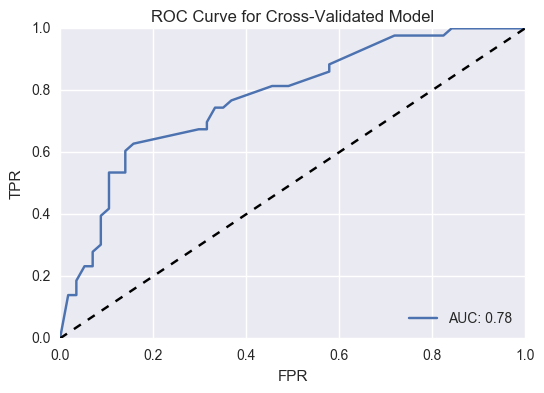

In [476]:
plt.plot(fpr, tpr, label='AUC: {:.2}'.format(sklearn.metrics.auc(fpr, tpr)))
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC Curve for Cross-Validated Model')
plt.plot([0, 1], [0, 1], 'k--')
plt.legend(loc='lower right')

### Compare L1 and L2 regularization for this logistic regression model. What effect does this have on the coefficients learned?

In [464]:
log_regL1 = sklearn.linear_model.LogisticRegressionCV(penalty = 'l1', solver='liblinear', Cs=[0.0001, 0.001, 0.01, 0.1, 0.5, 0.75, 1.0, 2.5, 5.0, 10.0, 100.0, 1000.0])
print 'cross-val scores: ', sklearn.cross_validation.cross_val_score(log_regL1, X, y)
print 'mean score:', sklearn.cross_validation.cross_val_score(log_regL1, X, y).mean()
print 'best c', log_regL1.fit(X, y).C_

cross-val scores:  [ 0.67647059  0.73267327  0.8       ]
mean score: 0.736381285187
best c [ 2.5]


In [486]:
y_predL1 = sklearn.cross_validation.cross_val_predict(log_regL1, X, y)
print 'accuracy:', sklearn.metrics.accuracy_score(y, y_predL1)
print 'precision:', sklearn.metrics.precision_score(y, y_predL1)
print 'recall:', sklearn.metrics.recall_score(y, y_predL1)

accuracy: 0.73597359736
precision: 0.748251748252
recall: 0.708609271523


In [494]:
df = pd.DataFrame({'*features' : X.design_info.column_names, 
                   'L1_model_coef': log_regCV.coef_[0,:],
                  'L2_model_coef': log_regL1.coef_[0,:]})
df

,*features,L1_model_coef,L2_model_coef
0,Intercept,0.000057,-2.306868
1,rating_cat[T.low_rating],1.599307,1.642488
2,rating_cat[T.no_rating],1.647095,1.662423
3,is_high_level,1.273834,1.291438
4,expensive_city,1.286287,1.281481
5,in_city,0.782776,0.751067
6,ds_in_name,1.639942,1.664911
7,engineer_in_name,1.014526,0.958372
8,ml_in_name,2.318485,2.788317


The model using L1 regularization doesn't impact the coefficients of each variable much (though they are mostly lower), however it has a huge impact on the intercept! The intercept in the L2 model puts the baseline odds around 1:10, whereas the L1 model puts the baseline odds around 1:1. Compared to the un-penalized model, though, both are much more conservative.

In [493]:
pd.DataFrame({'*scores': ['accuracy', 'precision', 'recall'],
             'L1_model': [sklearn.metrics.accuracy_score(y, y_predL1),sklearn.metrics.precision_score(y, y_predL1),sklearn.metrics.recall_score(y, y_predL1)],
             'L2_model': [sklearn.metrics.accuracy_score(y, y_pred),sklearn.metrics.precision_score(y, y_pred),sklearn.metrics.recall_score(y, y_pred)]})

,*scores,L1_model,L2_model
0,accuracy,0.735974,0.716172
1,precision,0.748252,0.730496
2,recall,0.708609,0.682119


The L1 model has better cross-validated accuracy, precision, and recall.

#### Optional: Continue to incorporate other text features from the title or summary that you believe will predict the salary and examine their coefficients. Take ~100 scraped entries with salaries. Convert them to use with your model and predict the salary. Which entries have the highest predicted salaries?

# Bonus Section: Use Count Vectorizer from scikit-learn to create features from the text summaries. 
- Examine using count or binary features in the model
- Re-evaluate the logistic regression model using these. Does this improve the model performance? 
- What text features are most valuable? 

In [652]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(max_features=15,stop_words="english")
vectorizer.fit(jobs_w_salary.summary)

vectorDF  = pd.DataFrame(vectorizer.transform(jobs_w_salary.summary).todense(),
              columns=vectorizer.get_feature_names())
vectorDF.head()

,analysis,analytics,company,data,experience,health,learning,looking,machine,public,research,scientist,scientists,team,work
0,0,0,0,3,0,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,2,0,0,0,2,0,0,0,0,0
2,0,0,0,0,0,2,0,0,0,2,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0
4,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0


In [653]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(max_features=15,stop_words="english")
vectorizer.fit(jobs_w_salary.title)

col = [x + '_tit' for x in vectorizer.get_feature_names()]

titlevectorDF  = pd.DataFrame(vectorizer.transform(jobs_w_salary.title).todense(),
              columns=col)
titlevectorDF.head()

,analyst_tit,data_tit,developer_tit,engineer_tit,engineering_tit,lead_tit,learning_tit,machine_tit,manager_tit,quantitative_tit,research_tit,science_tit,scientist_tit,senior_tit,software_tit
0,0,2,0,0,0,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0


In [590]:
df_with_wordcounts = jobs_w_salary.copy()

In [609]:
df_with_wordcounts = pd.concat([df_with_wordcounts.reset_index(), vectorDF], axis=1)

In [641]:
df_with_wordcounts.columns = [            u'index',        u'Unnamed: 0',           u'company_name',
          u'number_reviews',       u'search_city',       u'star_rating',
                 u'summary',             u'title',           u'website',
                u'how_paid',     u'annual_salary',      u'is_sponsored',
       u'time_since_posted',           u'in_city',              u'page',
               u'high_paid',     u'is_high_level',        u'ds_in_name',
              u'ml_in_name',       u'lab_in_name',   u'analyst_in_name',
        u'engineer_in_name',       u'dev_in_name',      u'tech_in_name',
              u'rating_cat',    u'expensive_city',          u'analysis',
               u'analytics',           u'company',              u'data',
              u'experience',            u'health',          u'learning',
                 u'looking',           u'machine',            u'public',
                u'research',         u'scientist',        u'scientists',
                    u'team',              u'work']

In [654]:
df_with_wordcounts = pd.concat([df_with_wordcounts.reset_index(), titlevectorDF], axis=1)

In [655]:
df_with_wordcounts.columns

Index([          u'level_0',             u'index',        u'Unnamed: 0',
            u'company_name',    u'number_reviews',       u'search_city',
             u'star_rating',           u'summary',             u'title',
                 u'website',          u'how_paid',     u'annual_salary',
            u'is_sponsored', u'time_since_posted',           u'in_city',
                    u'page',         u'high_paid',     u'is_high_level',
              u'ds_in_name',        u'ml_in_name',       u'lab_in_name',
         u'analyst_in_name',  u'engineer_in_name',       u'dev_in_name',
            u'tech_in_name',        u'rating_cat',    u'expensive_city',
                u'analysis',         u'analytics',           u'company',
                    u'data',        u'experience',            u'health',
                u'learning',           u'looking',           u'machine',
                  u'public',          u'research',         u'scientist',
              u'scientists',              u'team', 

In [656]:
# seeing if these word features improve the model
y, X = patsy.dmatrices('''high_paid ~ search_city + rating_cat + is_high_level + in_city + 
analysis + analytics + data + experience + health + learning + looking + machine + public + 
research + scientist + scientists + team + work + company + ds_in_name + ml_in_name + engineer_in_name''', data=df_with_wordcounts)
sm.Logit(y, X).fit().summary()

Optimization terminated successfully.
         Current function value: 0.353531
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              high_paid   No. Observations:                  303
Model:                          Logit   Df Residuals:                      271
Method:                           MLE   Df Model:                           31
Date:                Mon, 21 Nov 2016   Pseudo R-squ.:                  0.4900
Time:                        17:42:17   Log-Likelihood:                -107.12
converged:                       True   LL-Null:                       -210.02
                                        LLR p-value:                 1.073e-27
====================================================================================================
                                       coef    std err          z      P>|z|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------------------
Intercept                           -5.1450      1.021     -5.037      0.000        -7.147    -3.143
search_city[T.Austin, TX]           -2.1942      1.430     -1.535      0.125        -4.996     0.608
search_city[T.Boston, MA]            1.5711      0.901      1.744      0.081        -0.194     3.337
search_city[T.Detroit, MI]           1.7999      1.261      1.427      0.154        -0.672     4.272
search_city[T.Minneapolis, MN]       0.3245      1.360      0.239      0.811        -2.341     2.990
search_city[T.New Orleans, LA]       0.2632      1.627      0.162      0.871        -2.925     3.451
search_city[T.New York, NY]          1.0649      0.868      1.227      0.220        -0.636     2.766
search_city[T.San Francisco, CA]     2.9000      1.002      2.895      0.004         0.936     4.864
search_city[T.Seattle, WA]           0.1219      0.962      0.127      0.899        -1.764     2.008
search_city[T.Washington, DC]        0.9241      0.906      1.021      0.307        -0.851     2.699
rating_cat[T.low_rating]             1.6955      0.656      2.586      0.010         0.410     2.981
rating_cat[T.no_rating]              2.2258      0.509      4.369      0.000         1.227     3.224
is_high_level                        1.4038      0.443      3.171      0.002         0.536     2.272
in_city                              1.0962      0.428      2.560      0.010         0.257     1.935
analysis                             1.2451      0.601      2.073      0.038         0.068     2.422
analytics                            0.1444      0.467      0.309      0.757        -0.770     1.059
data                                 0.0331      0.220      0.150      0.881        -0.399     0.465
experience                           1.7370      0.549      3.163      0.002         0.661     2.813
health                               0.1197      0.755      0.159      0.874        -1.360     1.599
learning                            -1.0626      1.461     -0.727      0.467        -3.927     1.802
looking                              2.2079      0.863      2.560      0.010         0.517     3.898
machine                              0.3002      1.527      0.197      0.844        -2.692     3.292
public                               0.7227      0.835      0.866      0.387        -0.914     2.359
research                            -0.7006      0.485     -1.446      0.148        -1.651     0.249
scientist                            1.7704      0.713      2.484      0.013         0.373     3.168
scientists                          -0.2900      0.457     -0.635      0.526        -1.186     0.606
team                                 0.7558      0.544      1.390      0.164        -0.310     1.821
work                                 0.7198      0.556      1.294      0.196        -0.370     1.810
company                             -0.0182      0.642     -0.028      0.977        -1.277     1.241
ds_in_nam

In [645]:
#fit 

X = patsy.dmatrix('''~ search_city + rating_cat + is_high_level + in_city + 
analysis + analytics + data + experience + health + learning + looking + machine + public + 
research + scientist + scientists + team + work + company + ds_in_name + ml_in_name + engineer_in_name''', data=df_with_wordcounts)
y = df_with_wordcounts.high_paid.values

X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size=0.33, random_state = 109)

log_regCV = sklearn.linear_model.LogisticRegressionCV(Cs=[0.0001, 0.001, 0.01, 0.1, 0.5, 0.75, 1.0, 2.5, 5.0, 10.0, 100.0, 1000.0])
log_regCV.fit(X_train, y_train)
print 'best C: ', log_regCV.fit(X, y).C_
print 'Training model score on Test subset: ', log_regCV.score(X_test, y_test)
#note: I have no continuous features, so I have nothing to scale.

best C:  [ 0.5]
Training model score on Test subset:  0.82


cross-val scores:  [ 0.7745098   0.73267327  0.8       ]
mean cross-val:  0.769061023749
accuracy: 0.76897689769
precision: 0.834710743802
recall: 0.668874172185
AUC: 0.858833129335


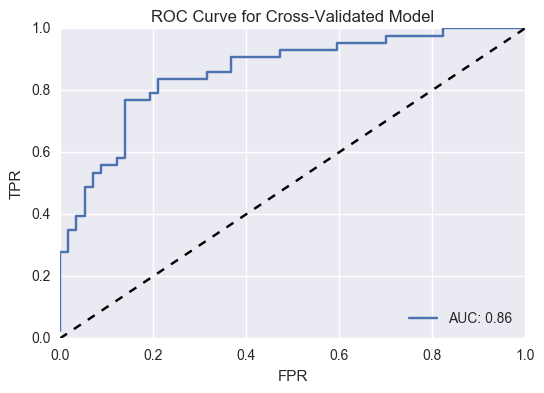

In [646]:
# looking at cross-validated scores
print 'cross-val scores: ', sklearn.model_selection.cross_val_score(log_regCV, X, y, cv=3)
print 'mean cross-val: ', sklearn.model_selection.cross_val_score(log_regCV, X, y, cv=3).mean()

#creating confusion matrix from cross-validated predictions.
y_pred = sklearn.model_selection.cross_val_predict(log_regCV, X, y, cv=3)

actual_vs_cross_val_pred = pd.DataFrame([y_pred, y]).transpose()
actual_vs_cross_val_pred.columns = ['cross_val_pred', 'actual']
pd.crosstab(actual_vs_cross_val_pred.cross_val_pred, actual_vs_cross_val_pred.actual)


print 'accuracy:', sklearn.metrics.accuracy_score(y, y_pred)
print 'precision:', sklearn.metrics.precision_score(y, y_pred)
print 'recall:', sklearn.metrics.recall_score(y, y_pred)


y_score = log_regCV.decision_function(X_test)
fpr, tpr, thresholds = sklearn.metrics.roc_curve(y_test, y_score)
print 'AUC:', sklearn.metrics.auc(fpr, tpr)


plt.plot(fpr, tpr, label='AUC: {:.2}'.format(sklearn.metrics.auc(fpr, tpr)))
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC Curve for Cross-Validated Model')
plt.plot([0, 1], [0, 1], 'k--')
plt.legend(loc='lower right')

In [735]:
# seeing if these word features improve the model
y, X = patsy.dmatrices('''high_paid ~ search_city + rating_cat + is_high_level + in_city + 
analysis + analytics + data + experience + health + learning + looking + machine + public + 
research + scientist + scientists + team + work + company + ds_in_name + ml_in_name + engineer_in_name
+ analyst_tit + data_tit + developer_tit + engineer_tit + engineering_tit + lead_tit + learning_tit + engineering_tit
+ lead_tit + learning_tit + machine_tit + manager_tit + quantitative_tit + research_tit + science_tit + scientist_tit + 
senior_tit + software_tit + page + time_since_posted + how_paid + number_reviews''', data=df_with_wordcounts)
sm.Logit(y, X).fit().summary()

         Current function value: 0.229154
         Iterations: 35


//anaconda/envs/py27/lib/python2.7/site-packages/statsmodels/base/model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              high_paid   No. Observations:                  303
Model:                          Logit   Df Residuals:                      245
Method:                           MLE   Df Model:                           57
Date:                Tue, 22 Nov 2016   Pseudo R-squ.:                  0.6694
Time:                        07:08:00   Log-Likelihood:                -69.434
converged:                      False   LL-Null:                       -210.02
                                        LLR p-value:                 2.223e-31
==============================================================================================================
                                                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------------------------------------
Intercept                                     -7.7978      1.902     -4.100      0.000       -11.526    -4.070
search_city[T.Austin, TX]                     -1.6698      2.534     -0.659      0.510        -6.636     3.296
search_city[T.Boston, MA]                      3.1105      1.453      2.140      0.032         0.262     5.959
search_city[T.Detroit, MI]                     1.2428      1.900      0.654      0.513        -2.482     4.968
search_city[T.Minneapolis, MN]                 1.2382      1.994      0.621      0.535        -2.671     5.147
search_city[T.New Orleans, LA]                 3.4917      2.431      1.436      0.151        -1.273     8.257
search_city[T.New York, NY]                    2.2379      1.413      1.584      0.113        -0.532     5.008
search_city[T.San Francisco, CA]               5.2868      1.637      3.231      0.001         2.079     8.494
search_city[T.Seattle, WA]                     3.0271      1.717      1.763      0.078        -0.339     6.393
search_city[T.Washington, DC]                  2.4200      1.369      1.767      0.077        -0.264     5.104
rating_cat[T.low_rating]                       0.7927      1.005      0.788      0.430        -1.178     2.763
rating_cat[T.no_rating]                        1.4671      0.743      1.974      0.048         0.010     2.924
time_since_posted[T.13-18 days ago]            1.9658      1.070      1.837      0.066        -0.131     4.063
time_since_posted[T.19-24 days ago]            1.3224      1.097      1.205      0.228        -0.828     3.473
time_since_posted[T.25-30 days ago]           -0.6715      1.328     -0.505      0.613        -3.275     1.932
time_since_posted[T.7-12 days ago]             0.1404      0.918      0.153      0.878        -1.658     1.939
time_since_posted[T.in the last day]          -1.2302      1.540     -0.799      0.424        -4.248     1.787
time_since_posted[T.more than 30 days ago]     0.9160      0.903      1.014      0.310        -0.854     2.686
how_paid[T.monthly]                          -25.5388   5.03e+04     -0.001      1.000     -9.85e+04  9.85e+04
how_paid[T.weekly]                           -21.1273   4758.487     -0.004      0.996     -9347.590  9305.335
how_paid[T.yearly]                             0.2070      0.761      0.272      0.786        -1.285     1.699
is_high_level                                  3.1040      1.184      2.621      0.009         0.783     5.425
in_city                                        1.3736      0.635      2.164      0.030         0.129     2.618
analysis                                       1.4113      1.059      1.333      0.183        -0.664     3.487
analytics                                     -1.0233      0.564     -1.814      0.070        -2.129     0.082
data                                           0.5226      0.361      1.449      0.147        -0.184     1.229
experience            

In [658]:
#fit 

X = patsy.dmatrix('''~ search_city + rating_cat + is_high_level + in_city + 
analysis + analytics + data + experience + health + learning + looking + machine + public + 
research + scientist + scientists + team + work + company + ds_in_name + ml_in_name + engineer_in_name
+ analyst_tit + data_tit + developer_tit + engineer_tit + engineering_tit + lead_tit + learning_tit + engineering_tit
+ lead_tit + learning_tit + machine_tit + manager_tit + quantitative_tit + research_tit + science_tit + scientist_tit + 
senior_tit + software_tit''', data=df_with_wordcounts)
y = df_with_wordcounts.high_paid.values

X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size=0.33, random_state = 109)

log_regCV = sklearn.linear_model.LogisticRegressionCV(Cs=[0.0001, 0.001, 0.01, 0.1, 0.5, 0.75, 1.0, 2.5, 5.0, 10.0, 100.0, 1000.0])
log_regCV.fit(X_train, y_train)
print 'best C: ', log_regCV.fit(X, y).C_
print 'Training model score on Test subset: ', log_regCV.score(X_test, y_test)
#note: I have no continuous features, so I have nothing to scale.

best C:  [ 0.1]
Training model score on Test subset:  0.8


cross-val scores:  [ 0.78431373  0.76237624  0.79      ]
mean cross-val:  0.778896654371
accuracy: 0.778877887789
precision: 0.823076923077
recall: 0.708609271523
AUC: 0.87474500204


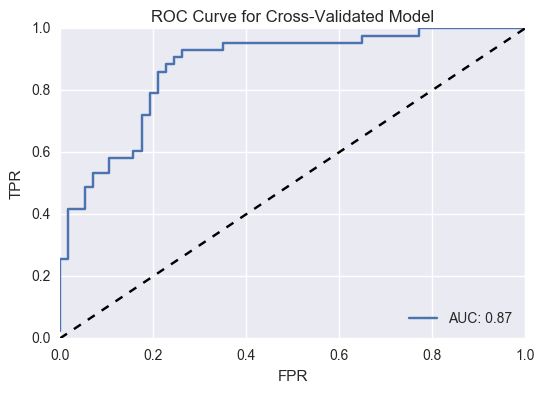

In [659]:
# looking at cross-validated scores
print 'cross-val scores: ', sklearn.model_selection.cross_val_score(log_regCV, X, y, cv=3)
print 'mean cross-val: ', sklearn.model_selection.cross_val_score(log_regCV, X, y, cv=3).mean()

#creating confusion matrix from cross-validated predictions.
y_pred = sklearn.model_selection.cross_val_predict(log_regCV, X, y, cv=3)

actual_vs_cross_val_pred = pd.DataFrame([y_pred, y]).transpose()
actual_vs_cross_val_pred.columns = ['cross_val_pred', 'actual']
pd.crosstab(actual_vs_cross_val_pred.cross_val_pred, actual_vs_cross_val_pred.actual)


print 'accuracy:', sklearn.metrics.accuracy_score(y, y_pred)
print 'precision:', sklearn.metrics.precision_score(y, y_pred)
print 'recall:', sklearn.metrics.recall_score(y, y_pred)


y_score = log_regCV.decision_function(X_test)
fpr, tpr, thresholds = sklearn.metrics.roc_curve(y_test, y_score)
print 'AUC:', sklearn.metrics.auc(fpr, tpr)


plt.plot(fpr, tpr, label='AUC: {:.2}'.format(sklearn.metrics.auc(fpr, tpr)))
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC Curve for Cross-Validated Model')
plt.plot([0, 1], [0, 1], 'k--')
plt.legend(loc='lower right')

In [741]:
#fit 

X = patsy.dmatrix('''~ search_city + rating_cat + is_high_level + in_city + 
analysis + analytics + data + experience + health + learning + looking + machine + public + 
research + scientist + scientists + team + work + company + ds_in_name + ml_in_name + engineer_in_name
+ analyst_tit + data_tit + developer_tit + engineer_tit + engineering_tit + lead_tit + learning_tit + engineering_tit
+ lead_tit + learning_tit + machine_tit + manager_tit + quantitative_tit + research_tit + science_tit + scientist_tit + 
senior_tit + software_tit + how_paid + page + number_reviews + time_since_posted''', data=df_with_wordcounts)
y = df_with_wordcounts.high_paid.values

X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size=0.33, random_state = 109)

log_regCV = sklearn.linear_model.LogisticRegressionCV(penalty='l1', solver='liblinear', Cs=[0.0001, 0.001, 0.01, 0.1, 0.5, 0.75, 1.0, 2.5, 5.0, 10.0, 100.0, 1000.0])
log_regCV.fit(X_train, y_train)
print 'best C: ', log_regCV.fit(X, y).C_
print 'Training model score on Test subset: ', log_regCV.score(X_test, y_test)
#note: I have no continuous features, so I have nothing to scale.

best C:  [ 1.]
Training model score on Test subset:  0.85


cross-val scores:  [ 0.7745098   0.74257426  0.78      ]
mean cross-val:  0.765694687116
accuracy: 0.765676567657
precision: 0.8125
recall: 0.688741721854
AUC: 0.935897435897
coefficients [[-1.16577857 -1.19339701  0.3522679   0.         -0.09562688  0.
   0.02016674  1.39515508 -0.15494791  0.          0.70422365  1.17380158
   0.23551947  0.19224737 -0.2675068   0.          0.          0.
   0.9619743   0.34181173  0.53868152 -0.02449591  0.20785079  0.95316999
   0.          1.18036901  0.          0.3988024   0.          1.16263531
  -0.25423693  0.59015136  0.64665646  0.13192402  0.67108476  0.
   0.38870244 -1.16788046  0.24028152  0.          0.71038797  0.
  -0.36585644  1.60105125  0.21471597  0.          3.36968038 -0.77166874
   0.          0.          0.          0.89725266]]


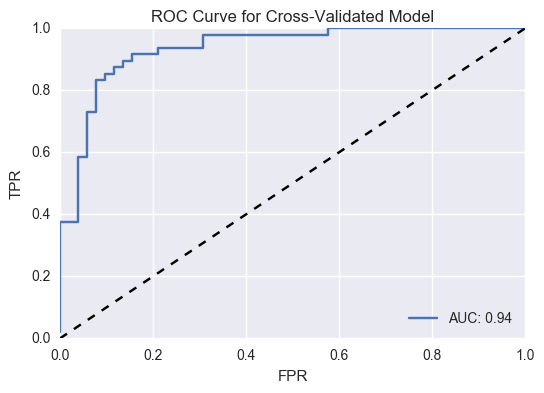

In [740]:
# looking at cross-validated scores
print 'cross-val scores: ', sklearn.model_selection.cross_val_score(log_regCV, X, y, cv=3)
print 'mean cross-val: ', sklearn.model_selection.cross_val_score(log_regCV, X, y, cv=3).mean()

#creating confusion matrix from cross-validated predictions.
y_pred = sklearn.model_selection.cross_val_predict(log_regCV, X, y, cv=3)

actual_vs_cross_val_pred = pd.DataFrame([y_pred, y]).transpose()
actual_vs_cross_val_pred.columns = ['cross_val_pred', 'actual']
pd.crosstab(actual_vs_cross_val_pred.cross_val_pred, actual_vs_cross_val_pred.actual)


print 'accuracy:', sklearn.metrics.accuracy_score(y, y_pred)
print 'precision:', sklearn.metrics.precision_score(y, y_pred)
print 'recall:', sklearn.metrics.recall_score(y, y_pred)


y_score = log_regCV.decision_function(X_test)
fpr, tpr, thresholds = sklearn.metrics.roc_curve(y_test, y_score)
print 'AUC:', sklearn.metrics.auc(fpr, tpr)
print 'coefficients', log_regCV.coef_


plt.plot(fpr, tpr, label='AUC: {:.2}'.format(sklearn.metrics.auc(fpr, tpr)))
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC Curve for Cross-Validated Model')
plt.plot([0, 1], [0, 1], 'k--')
plt.legend(loc='lower right')

In [742]:
closest_to_1 = 1
best_threshold = None
best_tpr = None
best_fpr = None
for fpr_, tpr_, threshold in zip(fpr, tpr, thresholds):
    dist = (fpr_**2 + (1-tpr_)**2)**.5
    if dist < closest_to_1:
        closest_to_1 = dist
        best_threshold = threshold
        best_tpr = tpr_
        best_fpr = fpr_
print 'closest to 1', closest_to_1
print 'best threshold', best_threshold
print 'best fpr, tpr:', best_fpr, best_tpr

closest to 1 0.170113519355
best threshold -0.271823372504
best fpr, tpr: 0.115384615385 0.875


In [743]:
math.e**best_threshold

0.7619888373847028

In [678]:
import math

In [713]:
df = pd.DataFrame({'*features' : X.design_info.column_names, 
                   'coefficients': log_regCV.coef_[0,:].round(3)})
df['odds_ratio'] = (math.e**df.coefficients).round(3)
df

,*features,coefficients,odds_ratio
0,Intercept,-1.387,0.250
1,"search_city[T.Austin, TX]",-0.071,0.931
2,"search_city[T.Boston, MA]",0.300,1.350
3,"search_city[T.Detroit, MI]",0.000,1.000
4,"search_city[T.Minneapolis, MN]",0.000,1.000
5,"search_city[T.New Orleans, LA]",0.000,1.000
6,"search_city[T.New York, NY]",0.000,1.000
7,"search_city[T.San Francisco, CA]",1.362,3.904
8,"search_city[T.Seattle, WA]",0.000,1.000
9,"search_city[T.Washington, DC]",0.000,1.000


In [714]:
def interpretation(odds_ratio):
    if odds_ratio == 1.0:
        return "no change"
    elif odds_ratio < 1:
        inv = odds_ratio**-1
        pct = round((100*(inv-1)), 2)
        return str(pct)+'% lower odds'
    else:
        pct = round((100*(odds_ratio-1)), 2)
        return str(pct)+'% greater odds'
df['interpretation'] = df.odds_ratio.apply(interpretation)
df.ix[0,'interpretation'] = 'base odds: 1:4'
df

,*features,coefficients,odds_ratio,interpretation
0,Intercept,-1.387,0.250,base odds: 1:4
1,"search_city[T.Austin, TX]",-0.071,0.931,7.41% lower odds
2,"search_city[T.Boston, MA]",0.300,1.350,35.0% greater odds
3,"search_city[T.Detroit, MI]",0.000,1.000,no change
4,"search_city[T.Minneapolis, MN]",0.000,1.000,no change
5,"search_city[T.New Orleans, LA]",0.000,1.000,no change
6,"search_city[T.New York, NY]",0.000,1.000,no change
7,"search_city[T.San Francisco, CA]",1.362,3.904,290.4% greater odds
8,"search_city[T.Seattle, WA]",0.000,1.000,no change
9,"search_city[T.Washington, DC]",0.000,1.000,no change


In [ ]:
for metric in ['accuracy', 'precision', 'recall', 'roc_auc']:
    scores = cross_val_score(model, X_scaled, y, cv=3, scoring=metric)
    print(metric, scores.mean(), scores.std())

In [ ]:
model.fit(X_scaled, y)

df = pd.DataFrame({'features' : vectorizer.get_feature_names(), 'coef': model.coef_[0,:]})
df.sort_values('coef', ascending=False, inplace=True)

In [ ]:
df.head()

In [ ]:
df.tail()

In [ ]:
# retest L1 and L2 regularization
from sklearn.linear_model import LogisticRegressionCV

model = LogisticRegressionCV()


Score: | /24
------|-------
Identify: Problem Statement and Hypothesis | 
Acquire: Import Data using BeautifulSoup| 
Parse: Clean and Organize Data| 
Model: Perform Logistic Regression| 
Evaluate: Logistic Regression Results	|
Present: Blog Report with Findings and Recommendations		| 
Interactive Tableau visualizations | 
Regularization |
Bonus: Countvectorizer  | 

In [273]:
from IPython.display import Audio
Audio(url="http://www.soundjay.com/button/beep-01a.mp3",autoplay=True)